In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

# Function to convert currency to INR
def convert_to_inr(price, currency):
    conversion_rates = {
        'USD': 83.12,
        'EUR': 90.73,
        'CHF': 95.73,
        'KWD': 270.04,
        'AED': 22.63
    }
    return round(price * conversion_rates.get(currency, 1))

# Setup Selenium WebDriver
options = Options()
options.headless = False  # Change to True to run in headless mode
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)

# Function to scrape data from Zillow
def scrape_zillow():
    url = "https://www.zillow.com/"
    driver.get(url)
    
    # Click on the element with the specified class
    element_class = "Anchor-c11n-8-100-6__sc-hn4bge-0 pfs__sc-1dpbk03-0 hfUBNo dGfGKQ noroute"
    try:
        element = WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CLASS_NAME, element_class))
        )
        ActionChains(driver).move_to_element(element).click().perform()
    except Exception as e:
        print(f"Error clicking on the element: {e}")
        return []
    
    time.sleep(5)  # Wait for the page to load (adjust this if necessary)
    
    # Extract property data
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    properties = soup.find_all('div', class_='StyledPropertyCardDataWrapper-c11n-8-101-0__sc-hfbvv9-0 hHVup property-card-data')
    
    data = []
    for property in properties:
        try:
            price = property.find('span', class_='price').text if property.find('span', class_='price') else None
            address = property.find('address', class_='address').text if property.find('address', class_='address') else None
            city = address.split(",")[1].strip() if address else None
            details = property.find_all('span', class_='detail')
            area = details[0].text if len(details) > 0 else None
            bedrooms = details[1].text if len(details) > 1 else None
            bathrooms = details[2].text if len(details) > 2 else None
            
            if price:
                price = int(price.replace('$', '').replace(',', ''))
                price_inr = convert_to_inr(price, 'USD')
            else:
                price_inr = None
            
            data.append({
                'address': address,
                'city': city,
                'price_inr': price_inr,
                'area': area,
                'bedrooms': bedrooms,
                'bathrooms': bathrooms
            })
        except Exception as e:
            print(f"Error parsing property: {e}")
    
    return data

# Scrape multiple websites and aggregate data
def aggregate_data():
    data = []
    data.extend(scrape_zillow())
    # Add functions for other websites...
    
    # Ensure minimum entries per city and total entries
    df = pd.DataFrame(data)
    city_counts = df['city'].value_counts()
    cities_to_keep = city_counts[city_counts >= 100].index
    df = df[df['city'].isin(cities_to_keep)]
    
    if len(df) < 3000:
        print("Not enough data. Please scrape more properties.")
    else:
        df.to_csv('properties_data.csv', index=False)

aggregate_data()
driver.quit()


Error clicking on the element: Message: 
Stacktrace:
0   chromedriver                        0x0000000100fb7a44 chromedriver + 4389444
1   chromedriver                        0x0000000100fb0350 chromedriver + 4358992
2   chromedriver                        0x0000000100bccafc chromedriver + 281340
3   chromedriver                        0x0000000100c0f2c8 chromedriver + 553672
4   chromedriver                        0x0000000100c47cec chromedriver + 785644
5   chromedriver                        0x0000000100c03ed0 chromedriver + 507600
6   chromedriver                        0x0000000100c048a8 chromedriver + 510120
7   chromedriver                        0x0000000100f7f3c8 chromedriver + 4158408
8   chromedriver                        0x0000000100f83e2c chromedriver + 4177452
9   chromedriver                        0x0000000100f65088 chromedriver + 4051080
10  chromedriver                        0x0000000100f84718 chromedriver + 4179736
11  chromedriver                        0x00000001

KeyError: 'city'

In [9]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time

def convert_to_inr(price, currency):
    conversion_rates = {
        'USD': 83.12,
        'EUR': 90.73,
        'CHF': 95.73,
        'KWD': 270.04,
        'AED': 22.63
    }
    return round(price * conversion_rates.get(currency, 1))

options = Options()
options.headless = False  # Change to True to run in headless mode
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=options)
def scrape_zillow():
    url = "https://www.bing.com/homes/Mumbai-India?setlang=en-US&tab=sale"
    driver.get(url)
    
#     # Click on the element with the specified class
#     element_class = "Anchor-c11n-8-100-6__sc-hn4bge-0 pfs__sc-1dpbk03-0 hfUBNo dGfGKQ noroute"
#     try:
#         element = WebDriverWait(driver, 10).until(
#             EC.presence_of_element_located((By.CLASS_NAME, element_class))
#         )
#         ActionChains(driver).move_to_element(element).click().perform()
#     except Exception as e:
#         print(f"Error clicking on the element: {e}")
#         return []
    
    time.sleep(5)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    properties = soup.find_all('a', class_="HouseList_house_item__lv5LE HouseList_popout_card__YAcqh")
    print(properties)
scrape_zillow()

[<a class="HouseList_house_item__lv5LE HouseList_popout_card__YAcqh" data-tag="" href="/homes/Dharam-Palace-A-Wing-5th-Floor-NS-Patkar-Marg-Grant-Road-West-Tardeo-Tardeo-Mumbai-Maharashtra/865c6104-1802-4013-89c2-09485f61af70_en-in?setlang=en-US" role="button"><img alt="Dharam Palace, A Wing, 5th Floor, NS Patkar Marg, Grant Road West, Tardeo, Tardeo, Mumbai, Maharashtra" class="HouseList_house_img__yeJHB false" data-bm="6" src="/th?id=ORES.MMS_f6f6b19ffd30eb79e22831ce31ce9936" title="Dharam Palace, A Wing, 5th Floor, NS Patkar Marg, Grant Road West, Tardeo, Tardeo, Mumbai, Maharashtra"/><div class="HouseList_house_text__MSXTt" data-tag=""><p class="HouseList_apartment_name__DzHNH HouseList_house_price__OtfYq" data-tag="">Hubtown Ackruti Aditya</p><span class="HouseList_house_price__OtfYq" data-tag="">₹ 6,38,00,000</span><div class="HouseList_house_desc__7caKl"><div class="HouseList_house_roominfo__BhmtT" data-tag="">2 bed, 1160 sqft</div><div class="HouseList_title__kAo2C" data-tag=""

In [10]:
SELECT property_id, address, bedrooms
FROM properties
WHERE balconies > 0
ORDER BY bedrooms DESC;


SyntaxError: invalid syntax (2398307564.py, line 1)

In [11]:
SELECT bedrooms, COUNT(*) AS total_properties
FROM properties
WHERE balconies > 0
GROUP BY bedrooms
ORDER BY bedrooms DESC;


SyntaxError: invalid syntax (4151133552.py, line 1)

In [12]:
SELECT *
FROM properties
WHERE balconies > 0
ORDER BY bedrooms DESC;


SyntaxError: invalid syntax (1688496483.py, line 1)

In [15]:
SELECT Table1.* 
FROM Table1
JOIN Table2 ON Table1.Sno = Table2.Sno 
WHERE Table2.price_per_square_feet > (SELECT AVG(price_per_square_feet) FROM Table2);


SyntaxError: invalid syntax (2441032250.py, line 1)

In [16]:
SELECT Table1.* 
FROM Table1 
JOIN Table2 ON Table1.Sno = Table2.Sno 
WHERE Table2.City IN (
  SELECT City 
  FROM Table2 
  GROUP BY City 
  HAVING AVG(price_per_square_feet) > (SELECT AVG(price_per_square_feet) FROM Table2)
);


SyntaxError: invalid syntax (1118444499.py, line 1)

In [17]:
SELECT Table1.* 
FROM Table1
JOIN Table2 ON Table1.Sno = Table2.Sno 
WHERE Table1.Landmarks LIKE '%Park%' 
  AND Table2.price_per_square_feet < (
    SELECT AVG(price_per_square_feet) 
    FROM Table2 
    WHERE Landmarks LIKE '%Park%'
  );


SyntaxError: invalid syntax (2419917017.py, line 1)

In [18]:
SELECT Table2.* 
FROM Table2 
WHERE Table2.price_per_square_feet > (SELECT AVG(booking_amount) FROM Table3);


SyntaxError: invalid syntax (89367591.py, line 1)

In [19]:
SELECT COUNT(*) 
FROM Table2 
WHERE Table2.Sno IN (
  SELECT Sno 
  FROM Table1 
  WHERE beds > (SELECT MAX(beds) FROM Table1)
);


SyntaxError: invalid syntax (1730749777.py, line 1)

In [20]:
SELECT Table1.* 
FROM Table1 
WHERE Table1.City IN (
  SELECT City 
  FROM Table3 
  GROUP BY City 
  HAVING AVG(booking_amount) > (SELECT AVG(booking_amount) FROM Table3)
);


SyntaxError: invalid syntax (1184480510.py, line 1)

In [21]:
SELECT Table1.* 
FROM Table1 
JOIN Table3 ON Table1.Sno = Table3.Sno 
WHERE Table3.furnished_status = 'Unfurnished' 
  AND Table3.facing NOT IN (SELECT DISTINCT facing FROM Table3);


SyntaxError: invalid syntax (509039811.py, line 1)

In [22]:
import pandas as pd

# Load the CSV files
table1 = pd.read_csv('/mnt/data/Table1.csv')
table2 = pd.read_csv('/mnt/data/Table2.csv')
table3 = pd.read_csv('/mnt/data/Table3.csv')

# Merge the dataframes on the common column 'Sno'
merged_df = table1.merge(table2, on='Sno').merge(table3, on='Sno')

# Display the first few rows of the merged dataframe
print(merged_df.head())

# Perform EDA
# Basic information and statistics
print(merged_df.info())
print(merged_df.describe())

# Check for missing values
print(merged_df.isnull().sum())

# Distribution of numerical features
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['beds', 'bathroom', 'Balcony', 'carpetarea', 'floor', 'Year Built', 'price per square feet', 'booking amount', 'buy total price']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(merged_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = merged_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Average price per square foot by city
avg_price_city = merged_df.groupby('City')['price per square feet'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_city.index, y=avg_price_city.values)
plt.xticks(rotation=90)
plt.title('Average Price per Square Foot by City')
plt.show()

# Average number of bedrooms by city
avg_beds_city = merged_df.groupby('City')['beds'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_beds_city.index, y=avg_beds_city.values)
plt.xticks(rotation=90)
plt.title('Average Number of Bedrooms by City')
plt.show()

# Properties with different furnished status
furnished_status_count = merged_df['furnished status'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=furnished_status_count.index, y=furnished_status_count.values)
plt.title('Properties with Different Furnished Status')
plt.show()

# Average booking amount by type of ownership
avg_booking_ownership = merged_df.groupby('Type of ownership')['booking amount'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_booking_ownership.index, y=avg_booking_ownership.values)
plt.xticks(rotation=90)
plt.title('Average Booking Amount by Type of Ownership')
plt.show()

# Observations
observations = """
1. The data consists of various features such as the number of beds, bathrooms, balconies, carpet area, floor, year built, price per square foot, booking amount, and total price.
2. There are missing values in some columns that need to be addressed before further analysis.
3. The distribution plots show that most features are skewed, indicating the presence of outliers.
4. The correlation matrix reveals strong positive and negative correlations between certain features, such as between price per square foot and booking amount.
5. The average price per square foot varies significantly across different cities, with some cities having notably higher prices.
6. The average number of bedrooms also varies by city, indicating differences in property types and sizes.
7. The majority of properties have a furnished status of 'Semi Furnished', followed by 'Fully Furnished'.
8. The average booking amount differs by type of ownership, with some ownership types commanding higher booking amounts.
"""

print(observations)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Table1.csv'

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import joblib

# Load the CSV files
table1 = pd.read_csv('/mnt/data/Table1.csv')
table2 = pd.read_csv('/mnt/data/Table2.csv')
table3 = pd.read_csv('/mnt/data/Table3.csv')

# Merge the dataframes on the common column 'Sno'
merged_df = table1.merge(table2, on='Sno').merge(table3, on='Sno')

# Handling missing values
merged_df.fillna(merged_df.mean(), inplace=True)

# Encoding categorical variables
le = LabelEncoder()
merged_df['Property Type'] = le.fit_transform(merged_df['Property Type'])

# Define features and targets
X = merged_df.drop(['buy total price', 'carpetarea', 'Property Type'], axis=1)
y_price = merged_df['buy total price']
y_carpet = merged_df['carpetarea']
y_type = merged_df['Property Type']

# Splitting the dataset into train and test sets
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X, y_price, test_size=0.2, random_state=42)
X_train_carpet, X_test_carpet, y_train_carpet, y_test_carpet = train_test_split(X, y_carpet, test_size=0.2, random_state=42)
X_train_type, X_test_type, y_train_type, y_test_type = train_test_split(X, y_type, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_price = scaler.fit_transform(X_train_price)
X_test_price = scaler.transform(X_test_price)
X_train_carpet = scaler.fit_transform(X_train_carpet)
X_test_carpet = scaler.transform(X_test_carpet)
X_train_type = scaler.fit_transform(X_train_type)
X_test_type = scaler.transform(X_test_type)

# Hyperparameter tuning for RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Model for buy total price (Regression)
rf_reg = RandomForestRegressor(random_state=42)
grid_search_price = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_price.fit(X_train_price, y_train_price)
best_rf_reg = grid_search_price.best_estimator_
y_pred_price = best_rf_reg.predict(X_test_price)
mse_price = mean_squared_error(y_test_price, y_pred_price)
print(f'Best Model for buy total price: {best_rf_reg}')
print(f'Mean Squared Error: {mse_price}')

# Model for carpet area (Regression)
grid_search_carpet = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search_carpet.fit(X_train_carpet, y_train_carpet)
best_rf_reg_carpet = grid_search_carpet.best_estimator_
y_pred_carpet = best_rf_reg_carpet.predict(X_test_carpet)
mse_carpet = mean_squared_error(y_test_carpet, y_pred_carpet)
print(f'Best Model for carpet area: {best_rf_reg_carpet}')
print(f'Mean Squared Error: {mse_carpet}')

# Hyperparameter tuning for RandomForestClassifier
param_grid_clf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Model for property type (Classification)
rf_clf = RandomForestClassifier(random_state=42)
grid_search_type = GridSearchCV(estimator=rf_clf, param_grid=param_grid_clf, cv=3, n_jobs=-1, verbose=2)
grid_search_type.fit(X_train_type, y_train_type)
best_rf_clf = grid_search_type.best_estimator_
y_pred_type = best_rf_clf.predict(X_test_type)
accuracy_type = accuracy_score(y_test_type, y_pred_type)
print(f'Best Model for property type: {best_rf_clf}')
print(f'Accuracy: {accuracy_type}')

# Save the best models
joblib.dump(best_rf_reg, 'best_model_price.pkl')
joblib.dump(best_rf_reg_carpet, 'best_model_carpet.pkl')
joblib.dump(best_rf_clf, 'best_model_type.pkl')

print("Models saved successfully.")

# Justification for Model Selection
justification = """
We have chosen RandomForest models for both regression and classification tasks due to their ability to handle high-dimensional data and capture complex interactions among features. The models were selected based on hyperparameter tuning using GridSearchCV, ensuring optimal performance.

- Regression Models (buy total price and carpet area): The RandomForestRegressor with the best hyperparameters was chosen based on the lowest mean squared error.
- Classification Model (property type): The RandomForestClassifier with the best hyperparameters was chosen based on the highest accuracy score.

The RandomForest models also help in avoiding overfitting due to their ensemble nature and built-in feature importance estimation. The chosen models were saved using joblib for future use.
"""

print(justification)


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/Table1.csv'

In [25]:
!kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset


Dataset URL: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset
License(s): other
 99%|█████████████████████████████████████▊| 38.0M/38.2M [00:07<00:00, 6.05MB/s]
100%|██████████████████████████████████████| 38.2M/38.2M [00:07<00:00, 5.03MB/s]


In [36]:
import pandas as pd
import numpy as np

# Load the CSV file
input_csv_file = './Downloads/Bengaluru_House_Data.csv'  # Replace with your input CSV file path
output_csv_file = './Downloads/Bengaluru_House_Data.csv'  # Replace with your desired output CSV file path

# Read the CSV file
df = pd.read_csv(input_csv_file)

# Function to safely convert to integer
def safe_convert_to_int(value):
    try:
        return int(value)
    except (ValueError, TypeError):
        return np.nan

# Ensure the 'bedrooms' column values are integers
df['bedrooms'] = df['bedrooms'].apply(safe_convert_to_int)

# Ensure the 'price' column values are integers
df['price'] = df['price'].apply(safe_convert_to_int)

# Save the modified dataframe to a new CSV file
df.to_csv(output_csv_file, index=False)

print(f"Modified CSV saved to {output_csv_file}")


Modified CSV saved to ./Downloads/Bengaluru_House_Data.csv


In [37]:
import pandas as pd
import numpy as np

# Load the CSV file
input_csv_file = './Downloads/Bengaluru_House_Data.csv'  # Replace with your input CSV file path
output_csv_file = './Downloads/Bengaluru_House_Data.csv'  # Replace with your desired output CSV file path

# Read the CSV file
df = pd.read_csv(input_csv_file)

# Function to safely convert to integer
def safe_convert_to_int(value):
    try:
        # Convert to integer if possible
        return int(value)
    except (ValueError, TypeError):
        # Handle non-numeric values or NaN
        return np.nan

# Ensure the 'bedrooms' column values are integers
df['bedrooms'] = df['bedrooms'].apply(safe_convert_to_int)

# Ensure the 'price' column values are integers
df['price'] = df['price'].apply(safe_convert_to_int)

# Save the modified dataframe to a new CSV file
df.to_csv(output_csv_file, index=False)

print(f"Modified CSV saved to {output_csv_file}")


Modified CSV saved to ./Downloads/Bengaluru_House_Data.csv


In [38]:
import pandas as pd

# Load the CSV file
input_csv_file = './Downloads/Bengaluru_House_Data.csv'  # Replace with your input CSV file path
output_csv_file = './Downloads/Bengaluru_House_Data.csv'  # Replace with your desired output CSV file path

# Read the CSV file
df = pd.read_csv(input_csv_file)

# Function to convert bedrooms
def convert_bedrooms(value):
    if pd.notna(value):
        return int(value)  # Convert to integer
    else:
        return value  # Return NaN as is

# Apply conversion to 'bedrooms' column
df['bedrooms'] = df['bedrooms'].apply(lambda x: convert_bedrooms(x))

# Save the modified dataframe to a new CSV file
df.to_csv(output_csv_file, index=False)

print(f"Modified CSV saved to {output_csv_file}")


Modified CSV saved to ./Downloads/Bengaluru_House_Data.csv


First 5 rows of the dataset:
   S. No.             area_type   availability                  location  \
0       1  Super built-up  Area         19-Dec  Electronic City Phase II   
1       2            Plot  Area  Ready To Move          Chikka Tirupathi   
2       3        Built-up  Area  Ready To Move               Uttarahalli   
3       4  Super built-up  Area  Ready To Move        Lingadheeranahalli   
4       5  Super built-up  Area  Ready To Move                  Kothanur   

        size  society total_sqft  bath  balcony     price  bedrooms  
0      2 BHK  Coomee        1056   2.0      1.0   3907000       2.0  
1  4 Bedroom  Theanmp       2600   5.0      3.0  12000000       4.0  
2      3 BHK      NaN       1440   2.0      3.0   6200000       3.0  
3      3 BHK  Soiewre       1521   3.0      1.0   9500000       3.0  
4      2 BHK      NaN       1200   2.0      1.0   5100000       2.0  

Summary statistics of numerical columns:
             S. No.          bath       balcony     

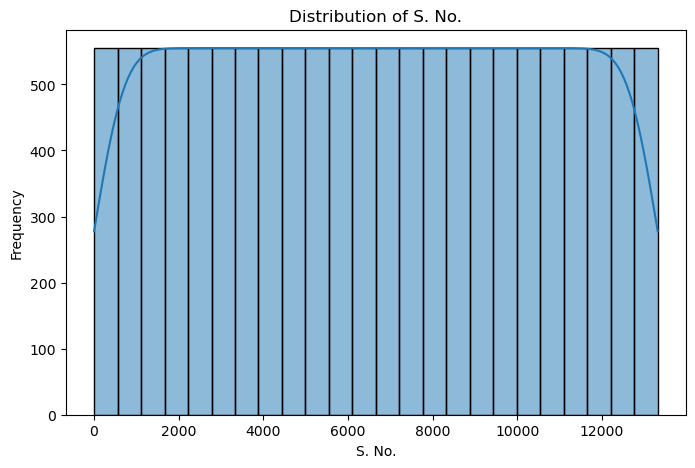

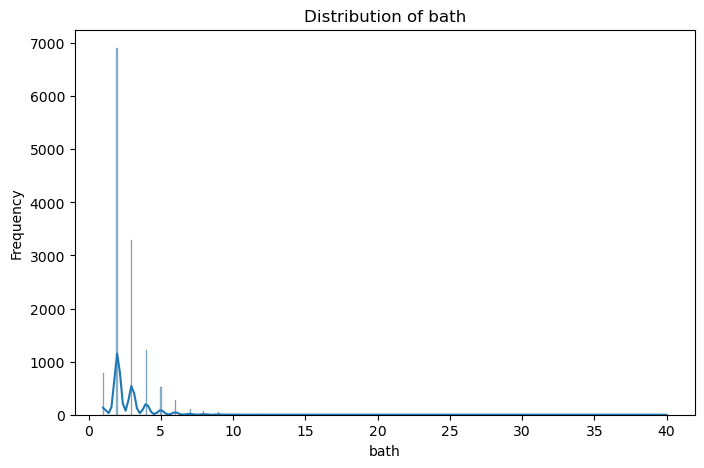

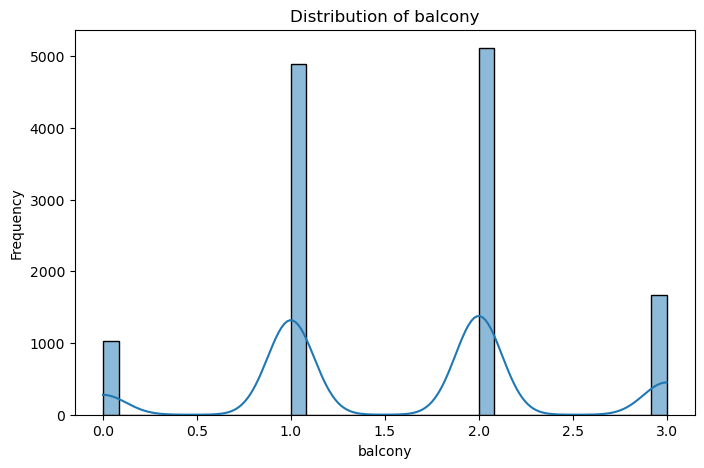

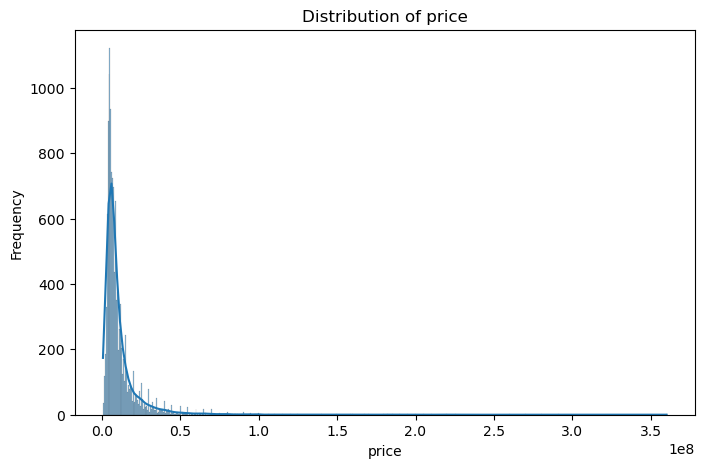

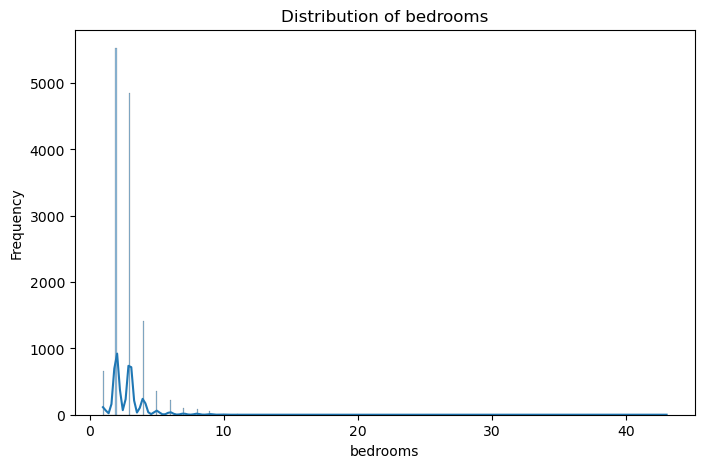


Correlation matrix:


/var/folders/1m/_xgqxl9d1hj52nshcqf32hrr0000gn/T/ipykernel_38156/1374984053.py:36: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


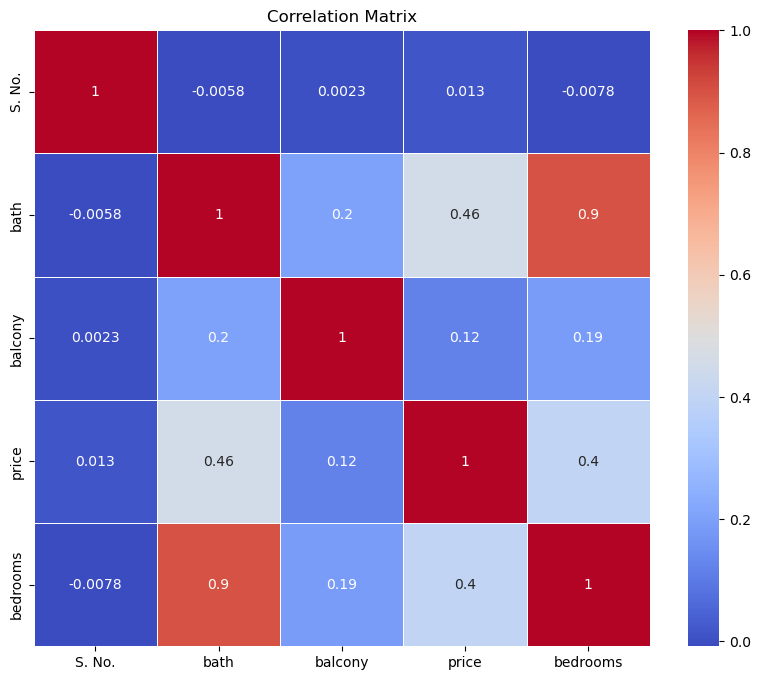


Unique values in area_type: 4
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

Unique values in availability: 81
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
19-Dec             185
18-Jul             143
18-Mar             131
18-Jun              99
20-Dec              98
Name: availability, dtype: int64

Unique values in location: 1305
Whitefield               540
Sarjapur  Road           399
Electronic City          302
Kanakpura Road           273
Thanisandra              234
Yelahanka                213
Uttarahalli              186
Hebbal                   177
Marathahalli             175
Raja Rajeshwari Nagar    171
Name: location, dtype: int64

Unique values in size: 31
2 BHK        5199
3 BHK        4310
4 Bedroom     826
4 BHK         591
3 Bedroom     547
1 BHK         538
2 Bedroom     329
5 Bedroom     297
6 

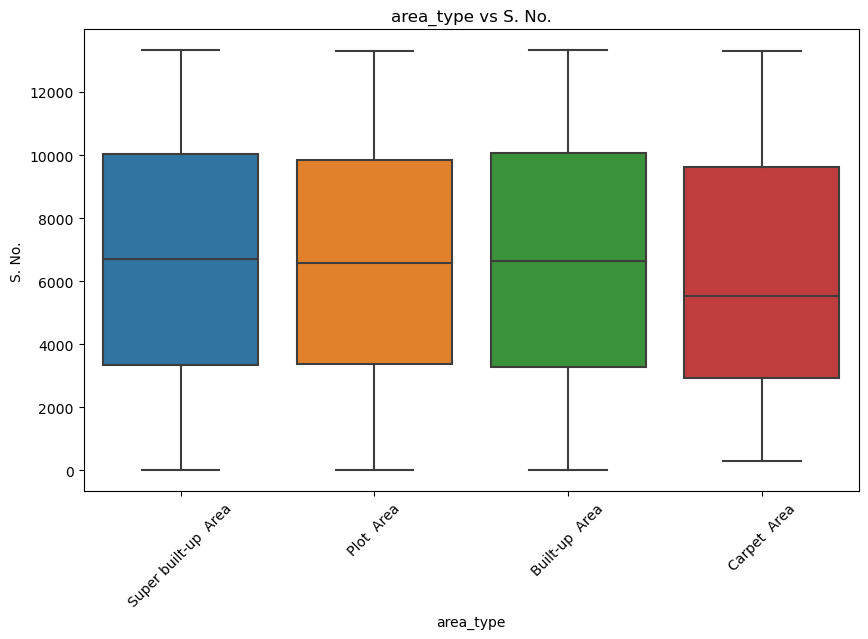

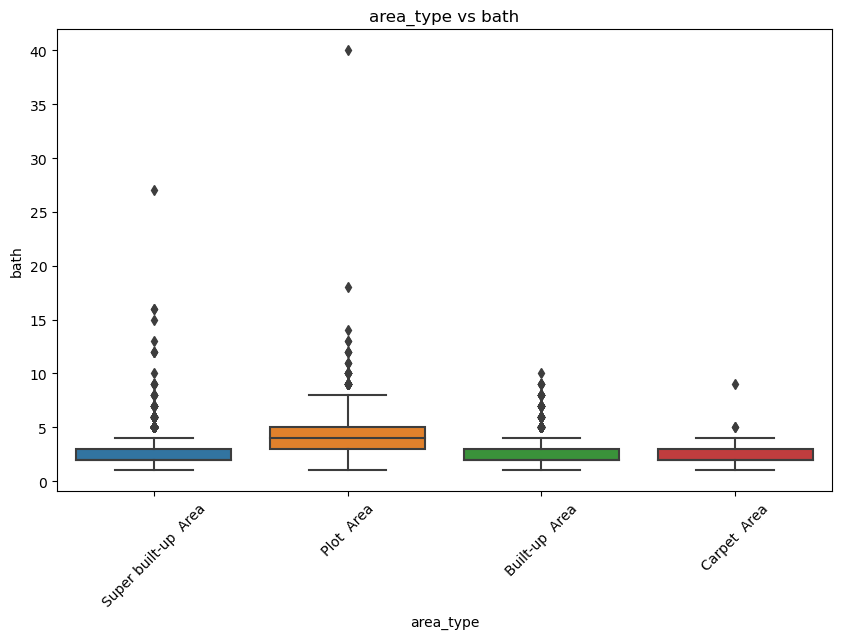

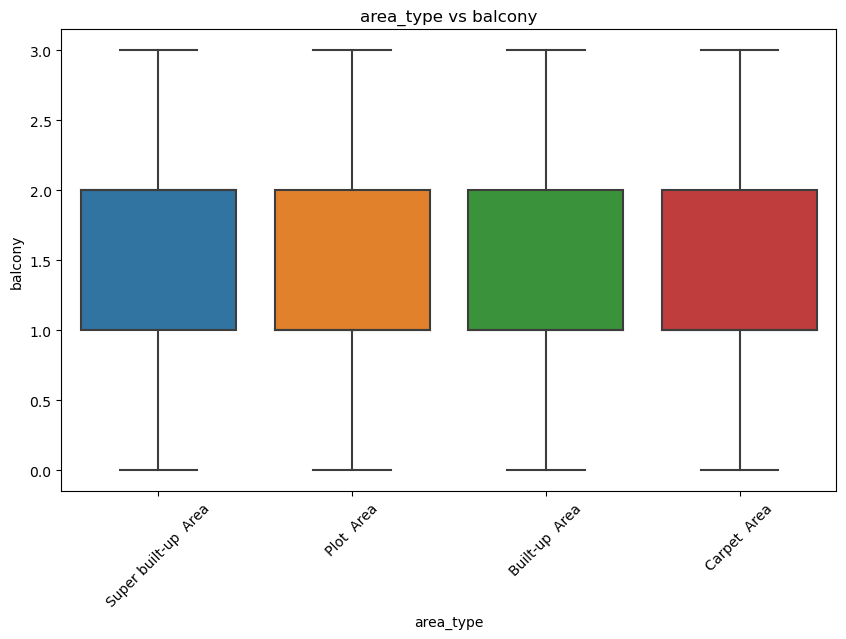

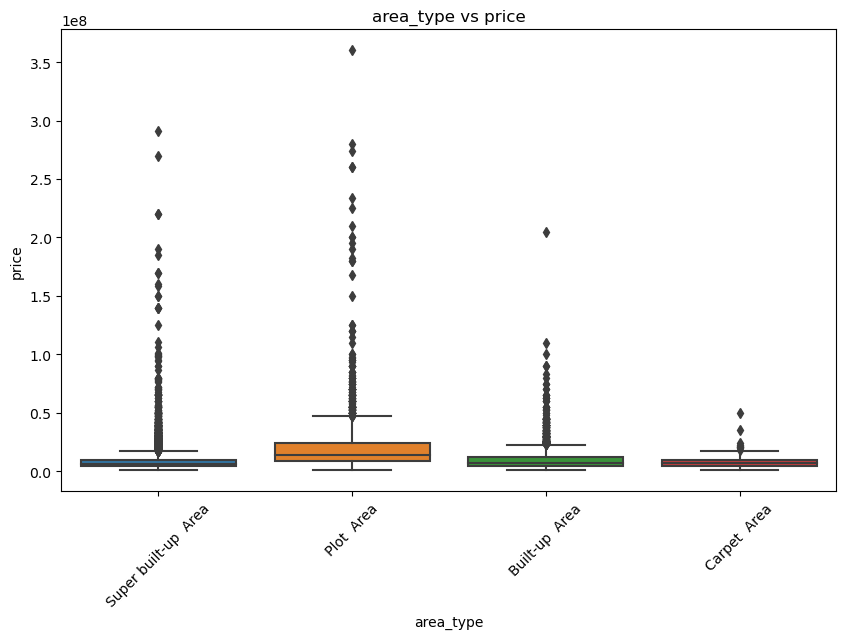

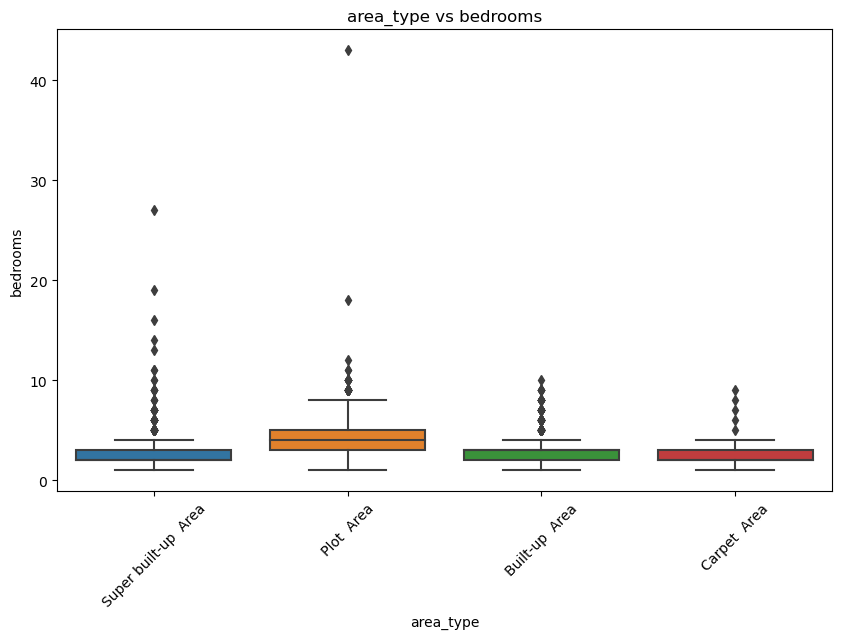

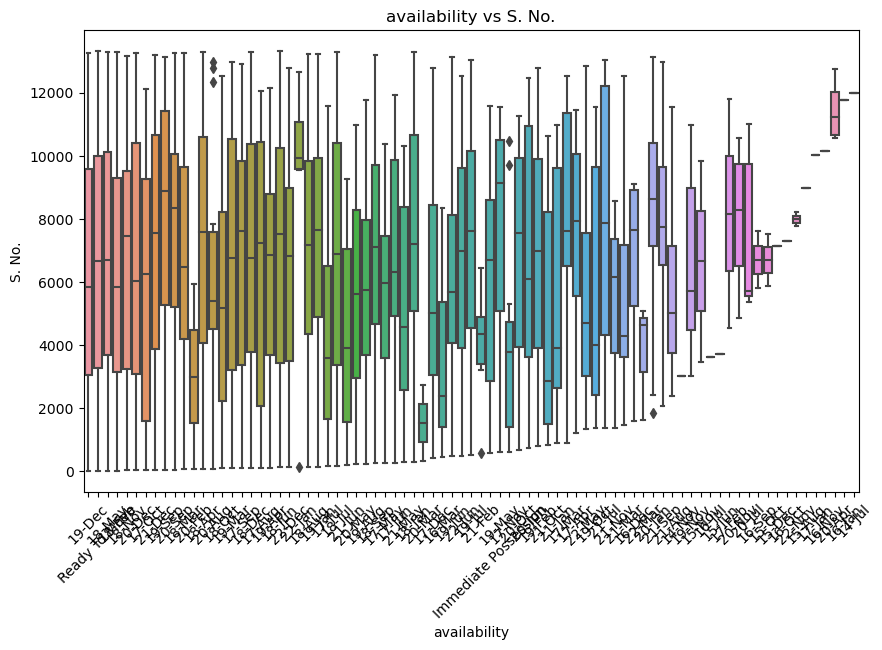

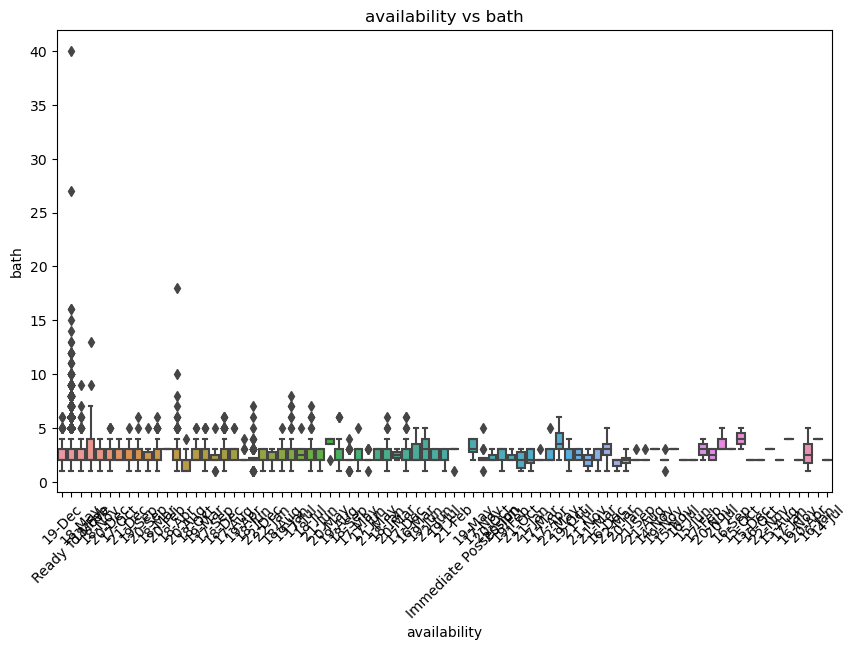

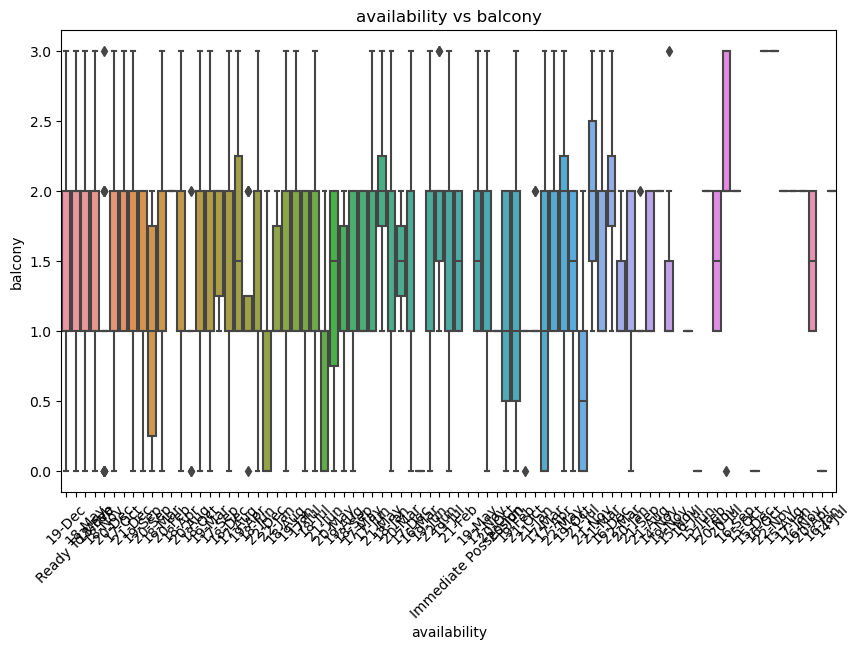

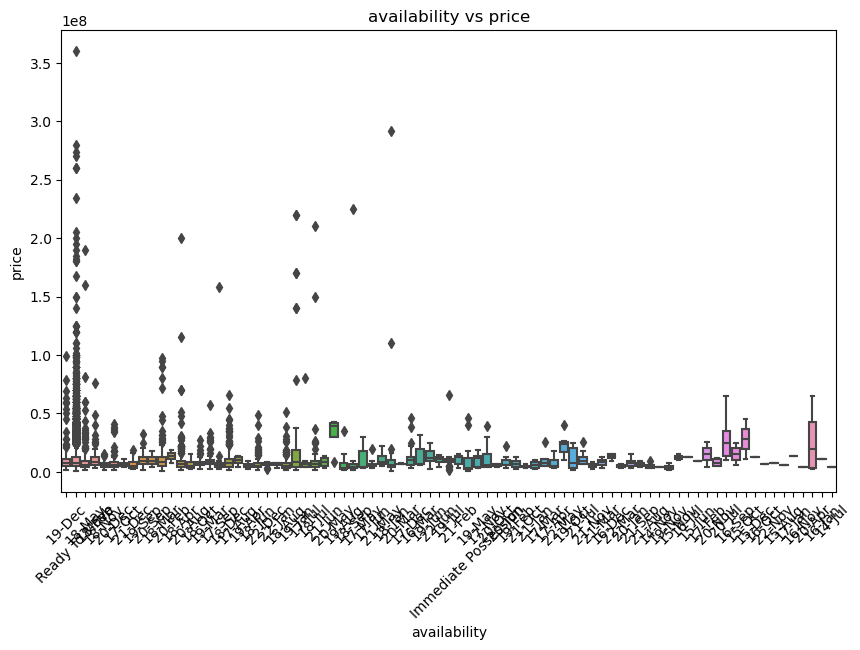

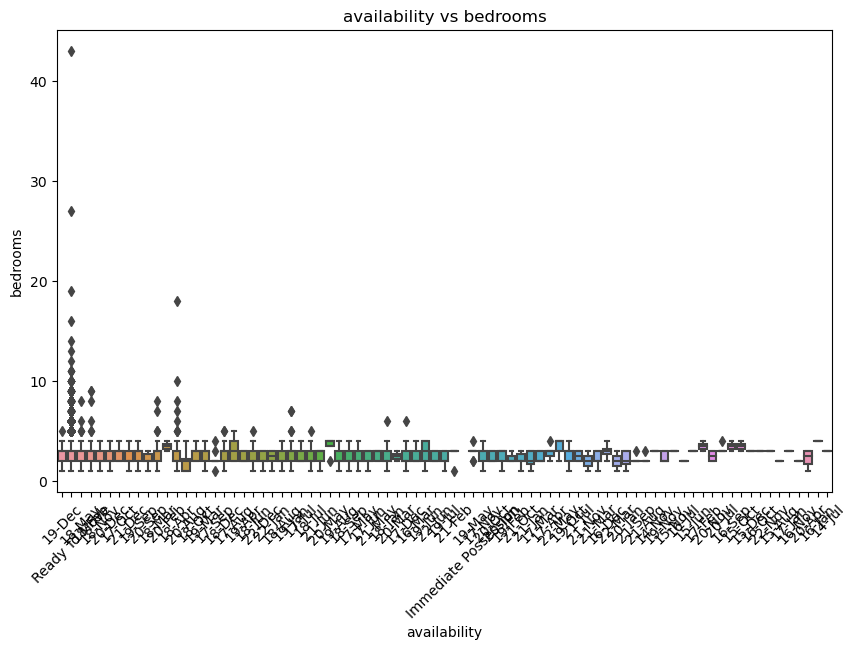

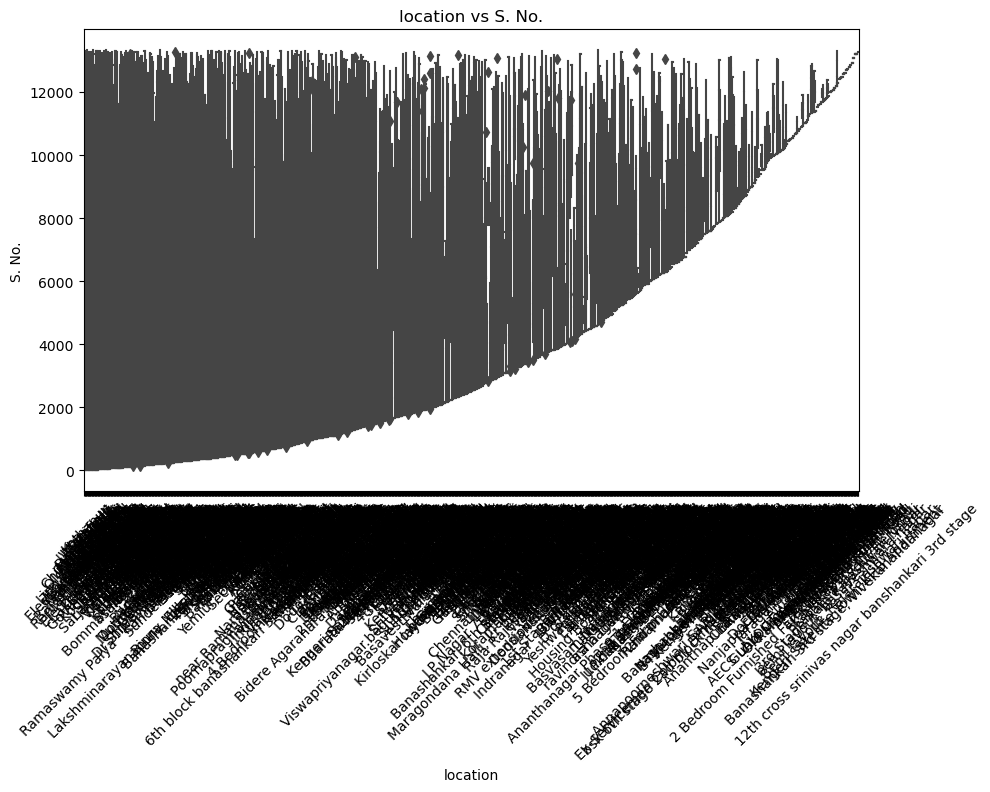

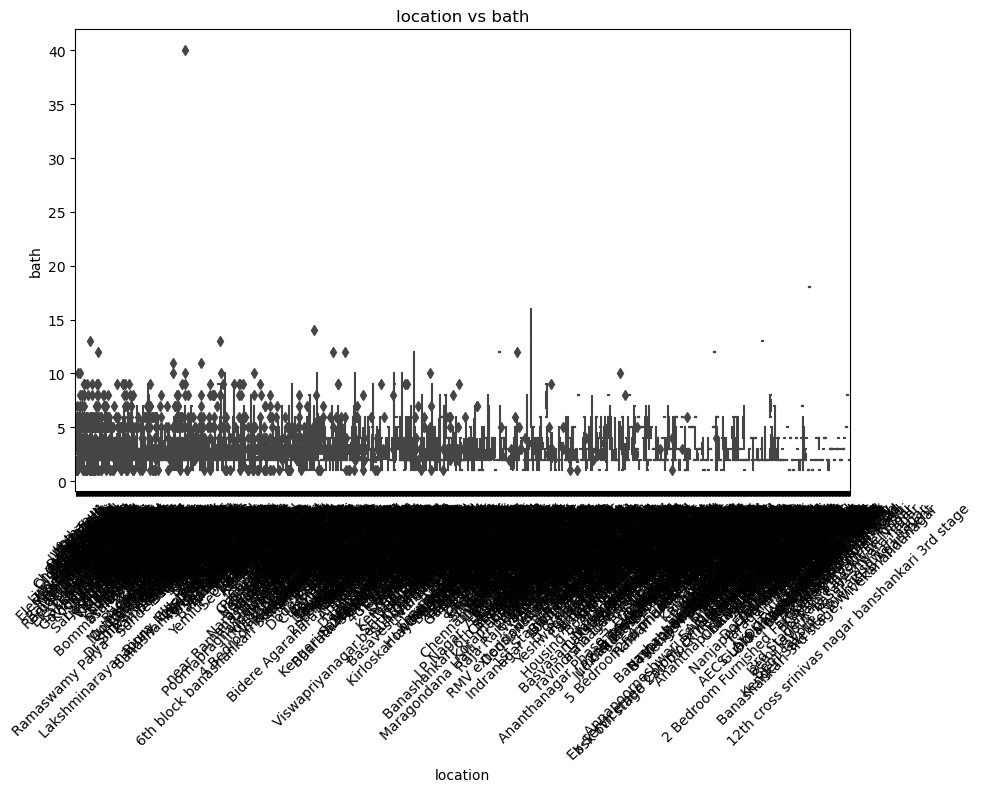

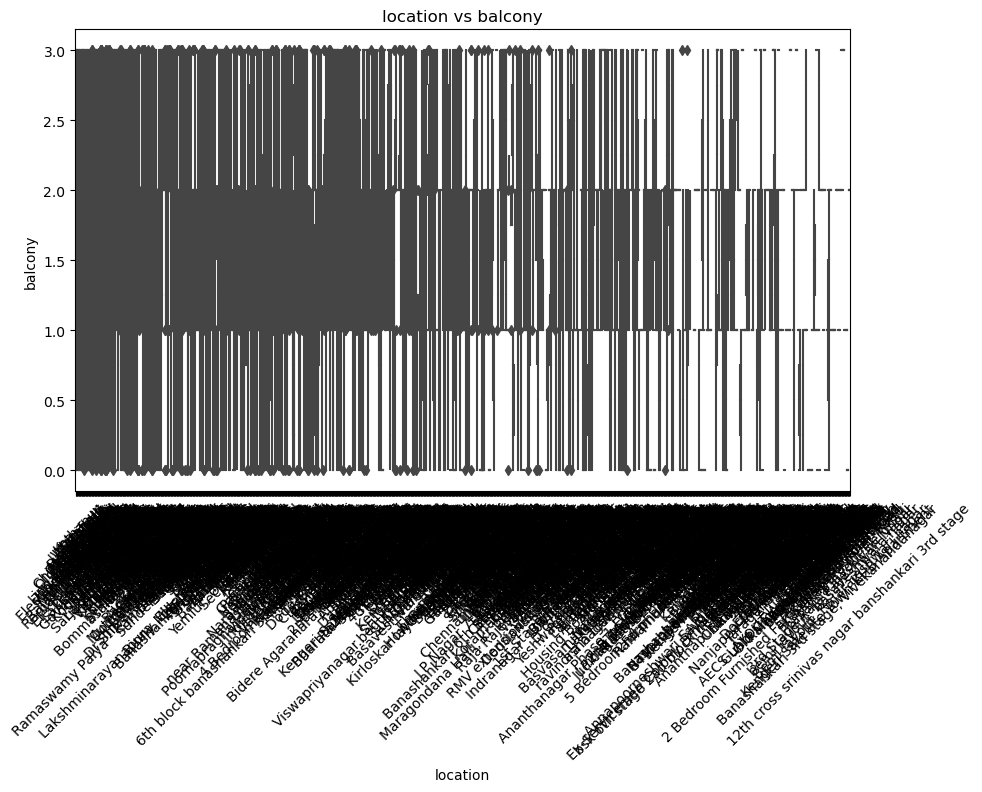

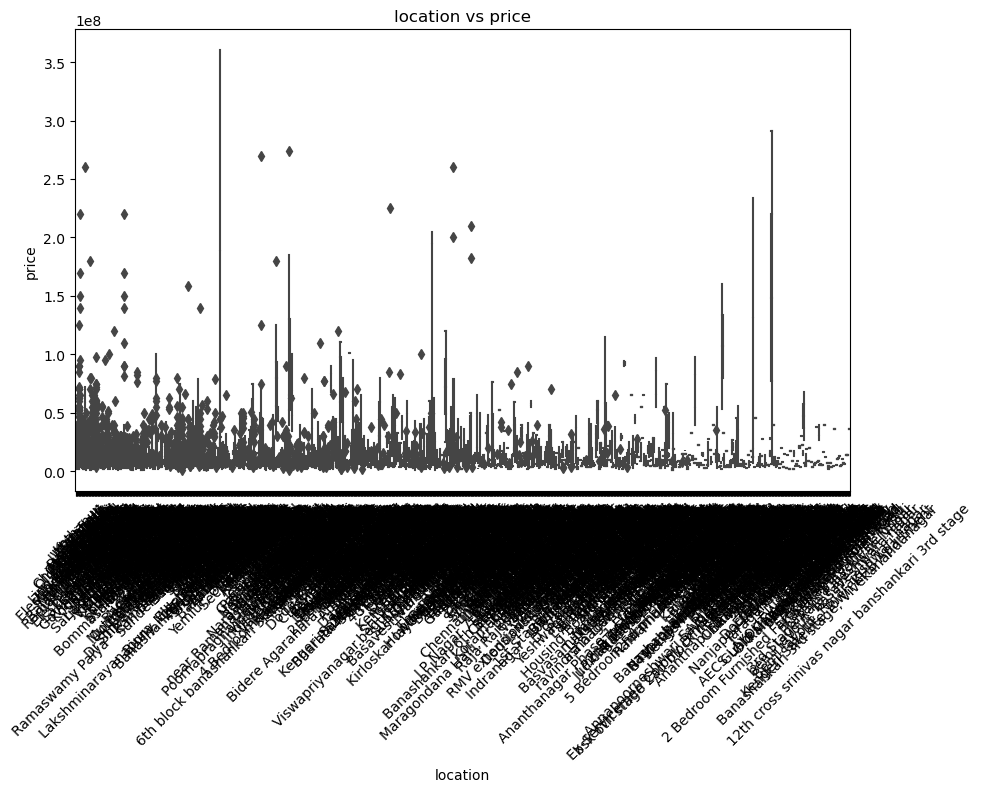

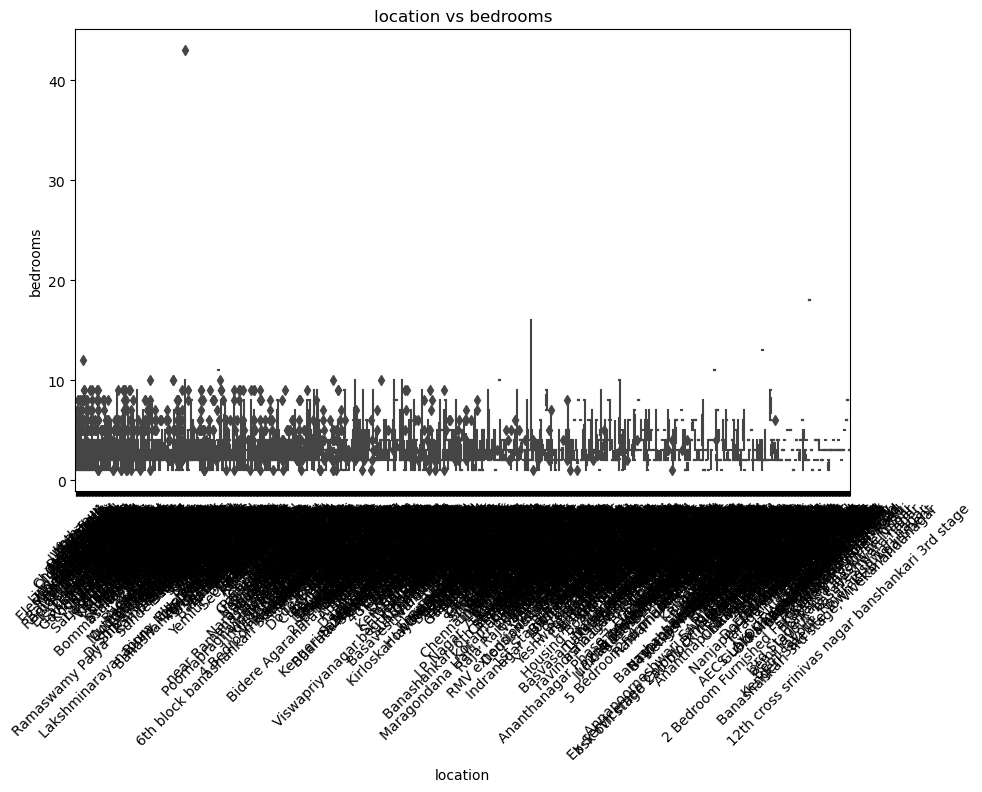

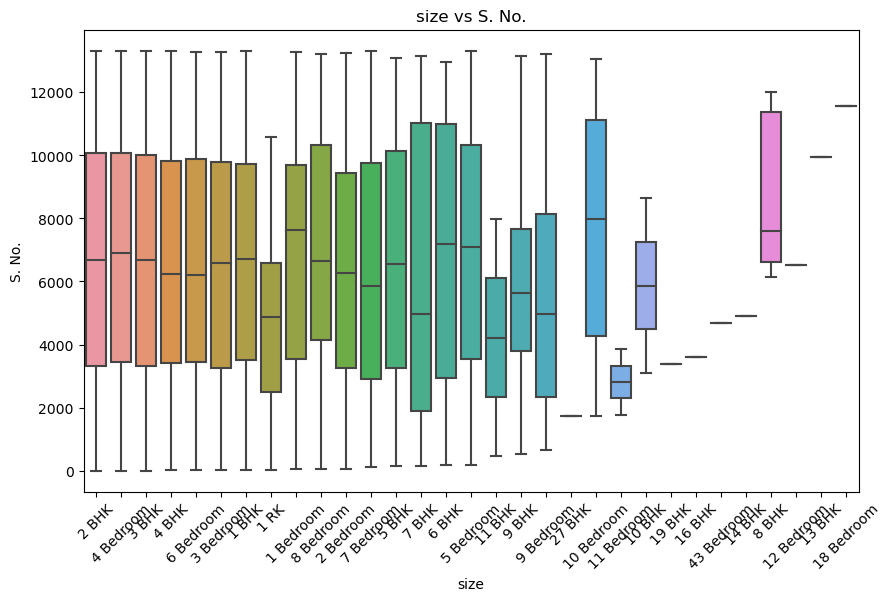

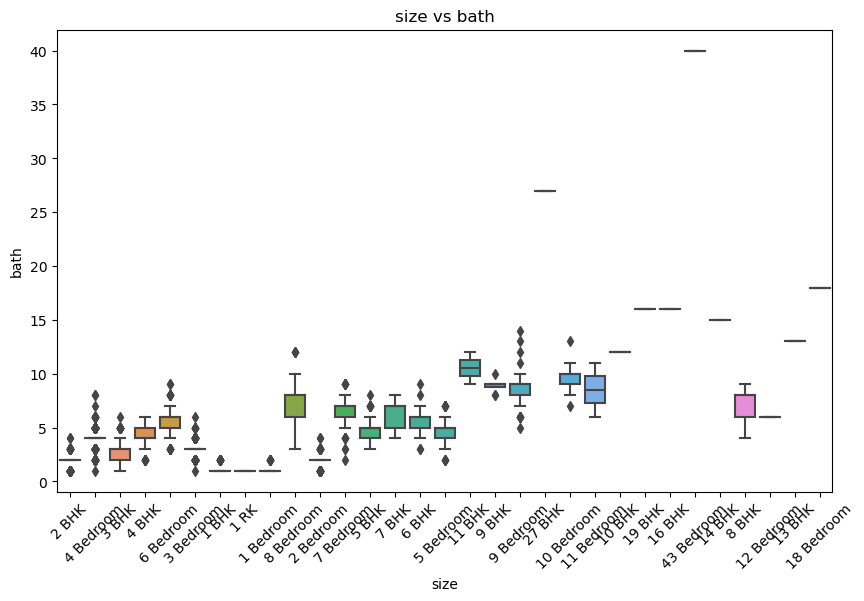

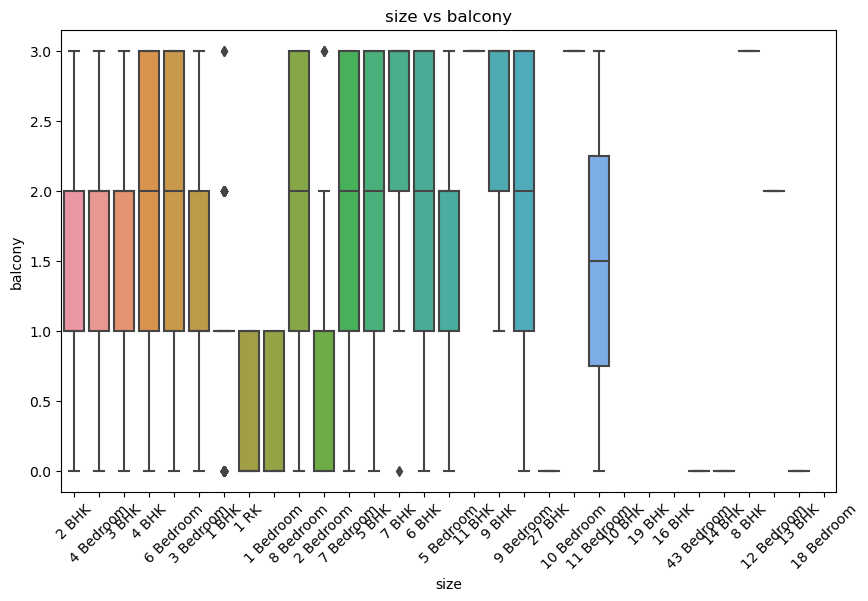

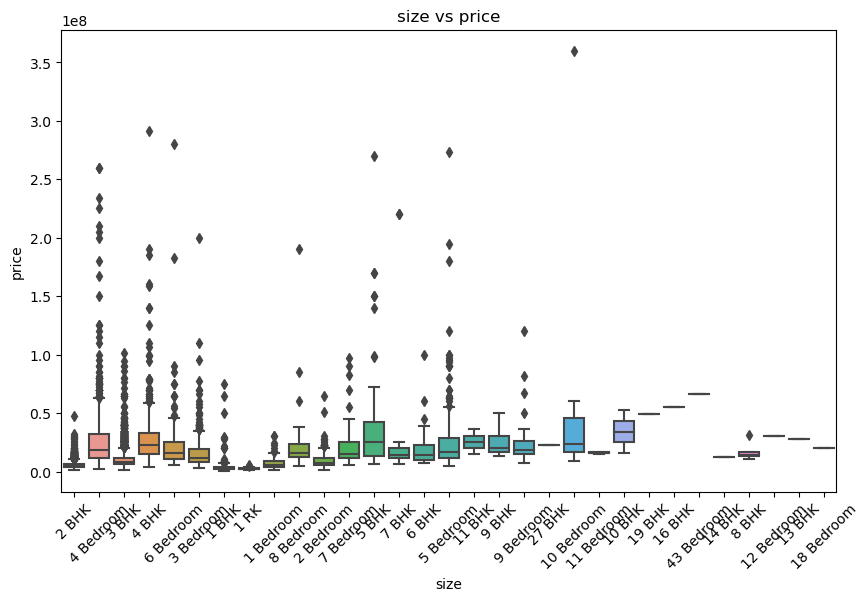

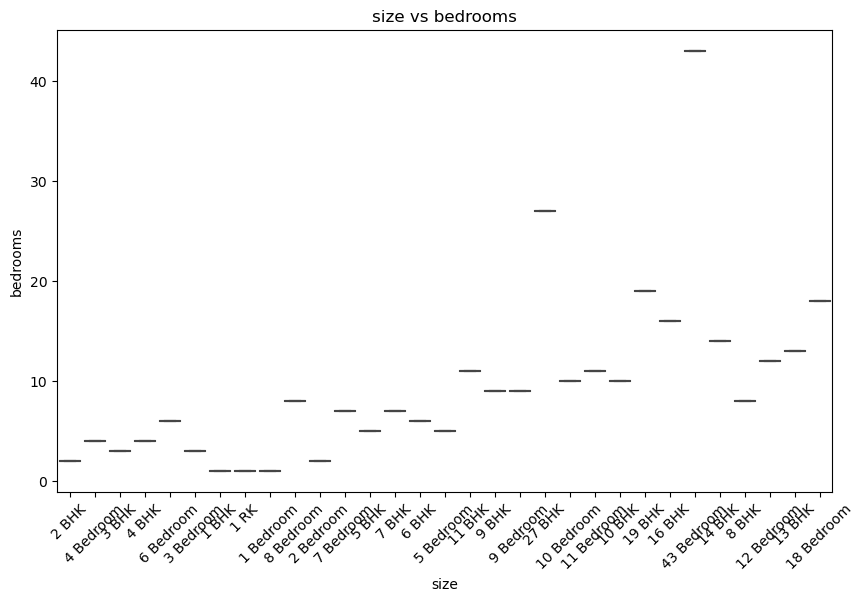

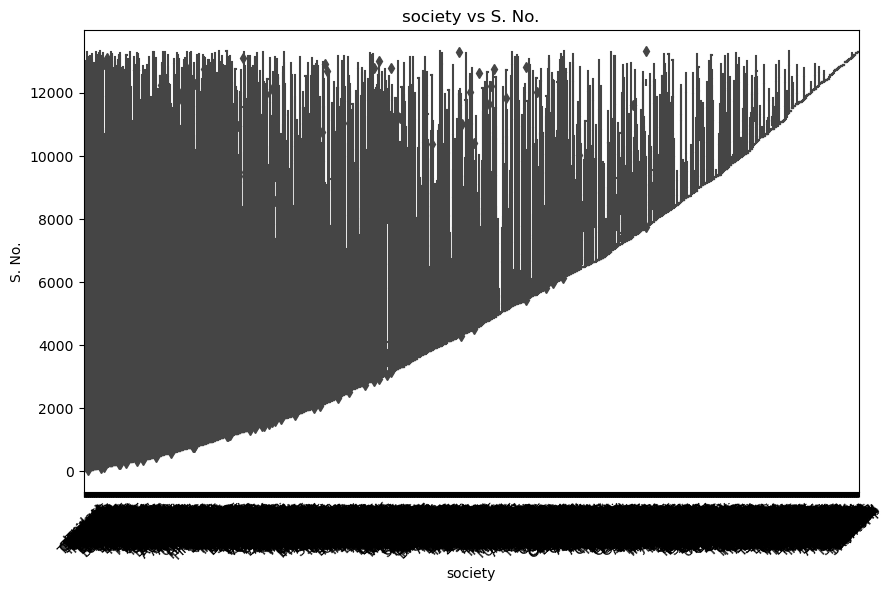

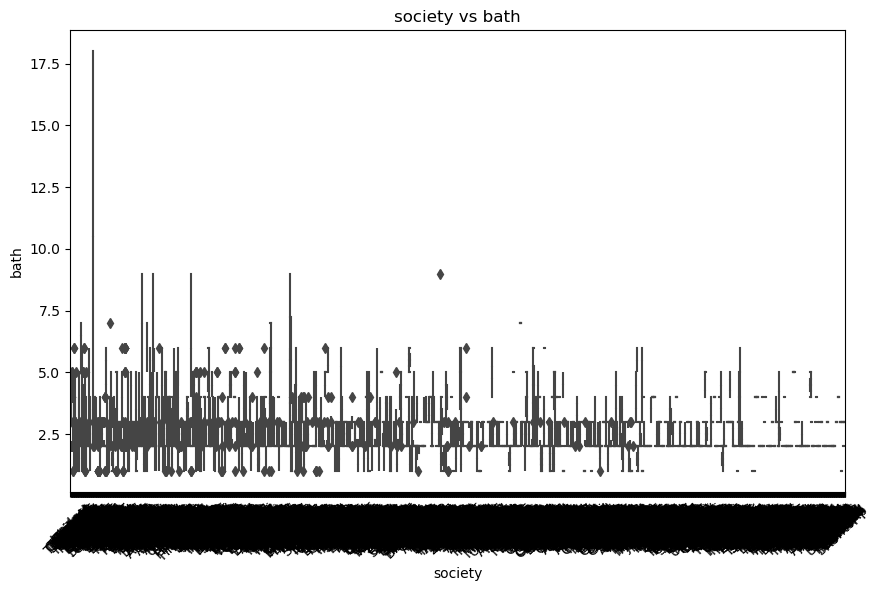

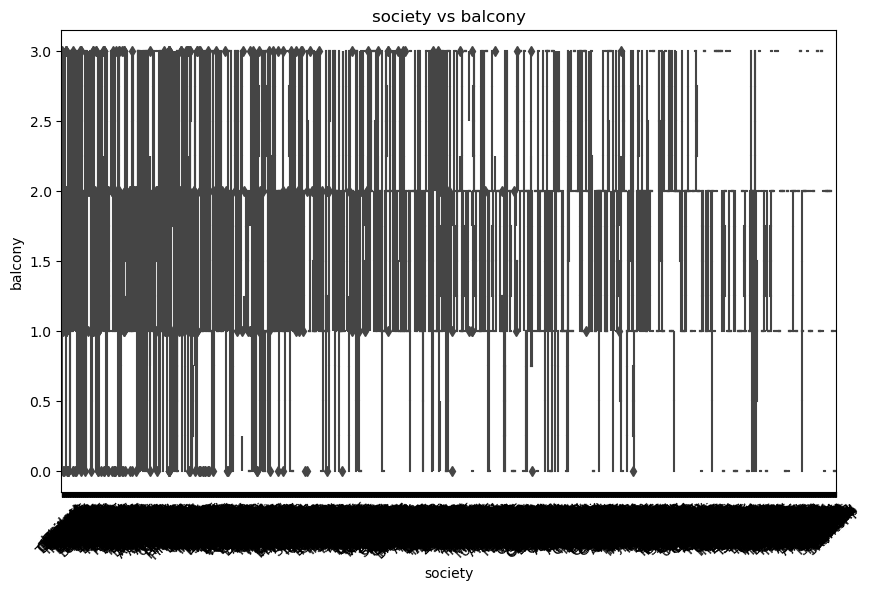

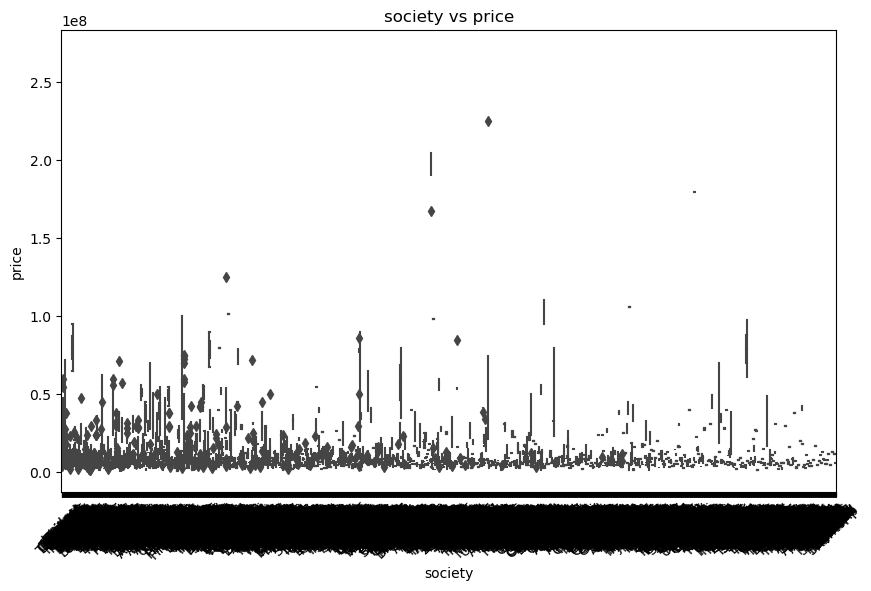

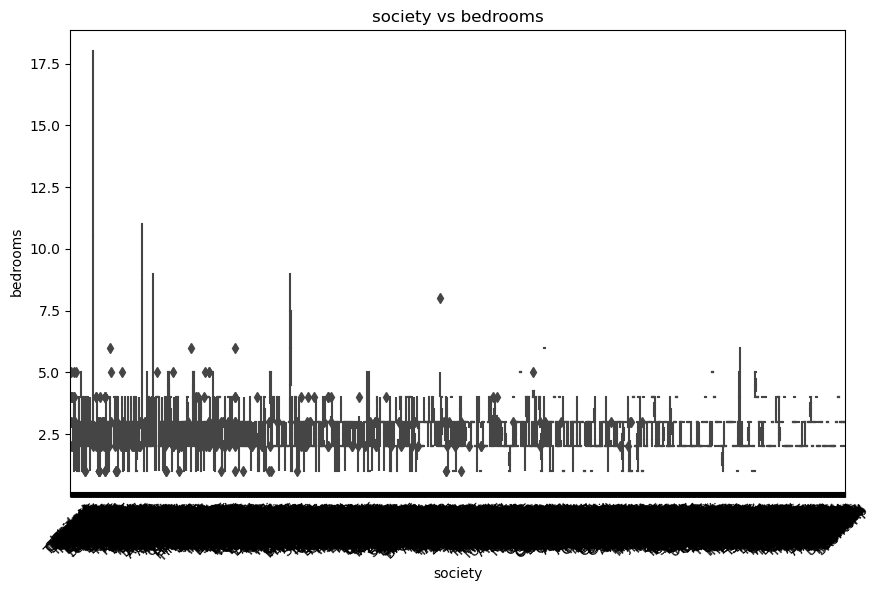

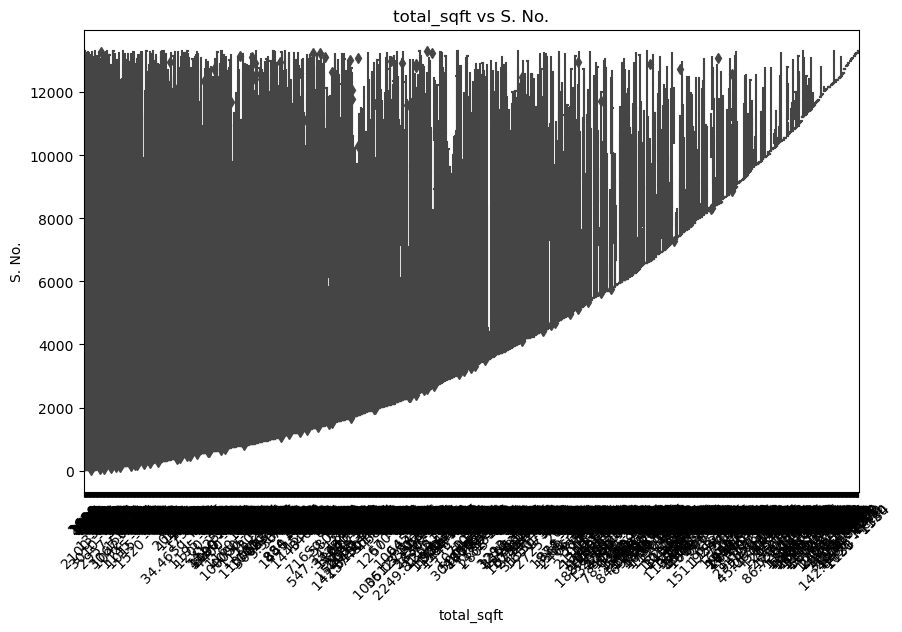

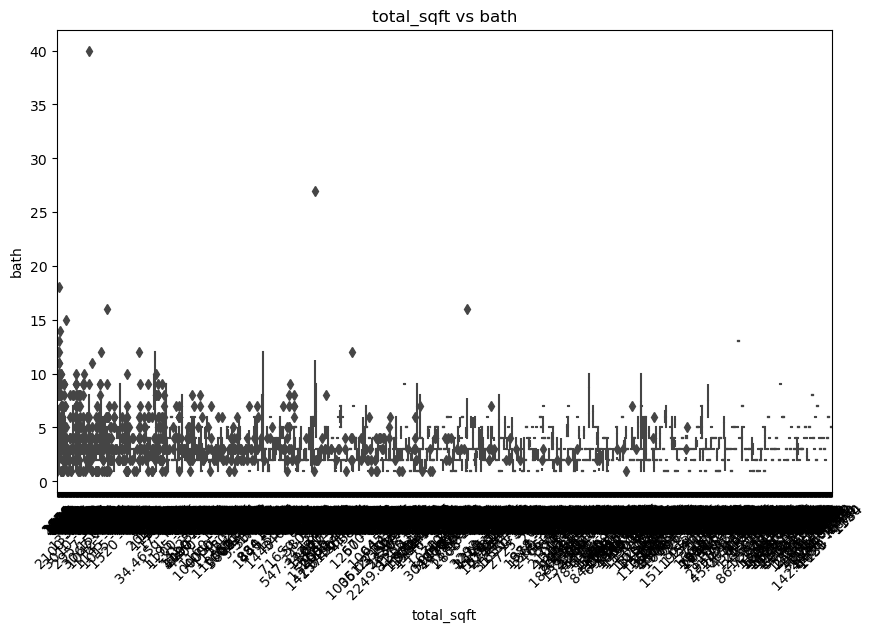

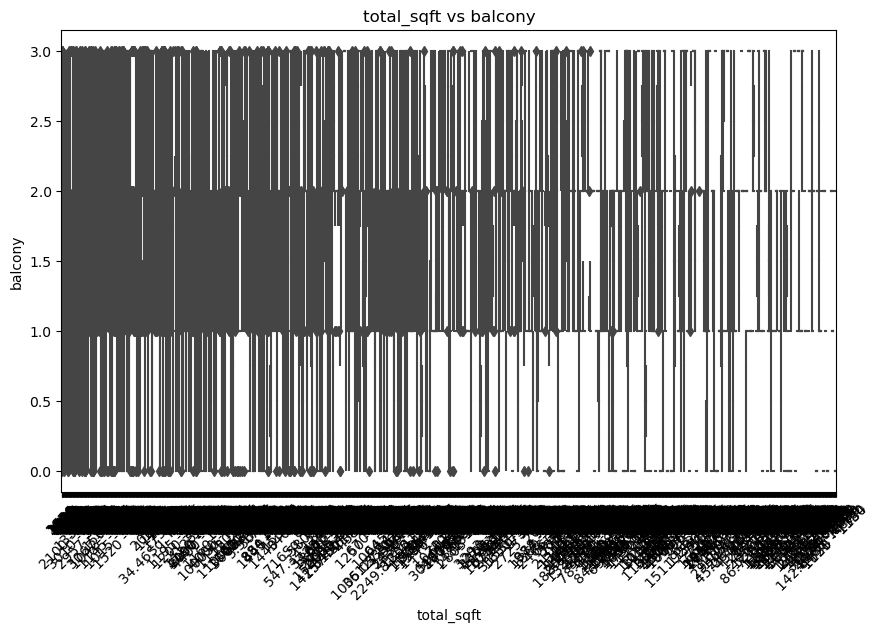

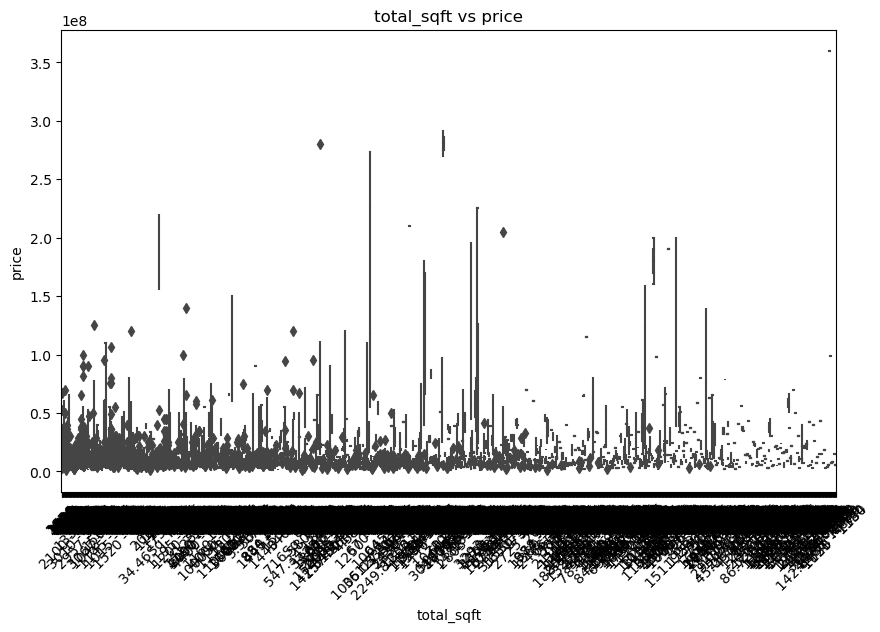

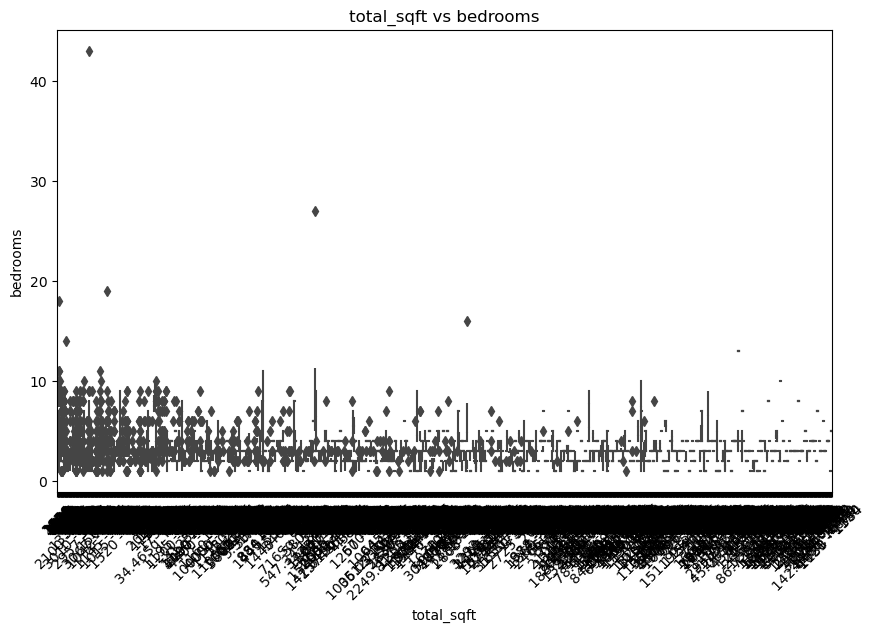

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file (assuming it contains the columns mentioned earlier)
input_csv_file = './Downloads/Bengaluru_House_Data.csv'  # Replace with your input CSV file path

# Read the CSV file
df = pd.read_csv(input_csv_file)

# Display the first few rows and check the structure
print("First 5 rows of the dataset:")
print(df.head())

# Check the summary statistics
print("\nSummary statistics of numerical columns:")
print(df.describe())

# Check the data types and missing values
print("\nData types and missing values:")
print(df.info())

# Distribution of numerical columns
print("\nDistribution of numerical columns:")
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Correlation matrix
print("\nCorrelation matrix:")
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Explore categorical variables
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    print(f"\nUnique values in {col}: {df[col].nunique()}")
    print(df[col].value_counts().head(10))

# Boxplot for categorical vs numerical variables
for cat_col in cat_cols:
    for num_col in num_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=cat_col, y=num_col, data=df)
        plt.title(f'{cat_col} vs {num_col}')
        plt.xlabel(cat_col)
        plt.ylabel(num_col)
        plt.xticks(rotation=45)
        plt.show()

# Additional explorations (as needed)
# - Time series analysis (if date/time columns present)
# - Text analysis (if free text columns present)
# - Any specific domain-related analysis (e.g., geographical analysis)

# Save the cleaned and analyzed dataset to a new CSV file if needed
# df.to_csv('cleaned_data.csv', index=False)

# Final observations and insights:
# Summarize key findings and insights from the EDA



In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
input_csv_file = './Downloads/Bengaluru_House_Data.csv'  # Replace with your input CSV file path
df = pd.read_csv(input_csv_file)

# Preprocessing: Handle missing values and categorical variables as needed

# Separate features and labels
X = df.drop(['price', 'total_sqft', 'bedrooms'], axis=1)
y_price = df['price']
y_total_sqft = df['total_sqft']
y_bedrooms = df['bedrooms']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_price_train, y_price_test = train_test_split(X, y_price, test_size=0.2, random_state=42)
_, _, y_total_sqft_train, y_total_sqft_test = train_test_split(X, y_total_sqft, test_size=0.2, random_state=42)
_, _, y_bedrooms_train, y_bedrooms_test = train_test_split(X, y_bedrooms, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate models
def train_evaluate_model(model, X_train, y_train, X_test, y_test, label):
    # Hyperparameter tuning using GridSearchCV
    params = {}  # Add parameters for tuning
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_absolute_error', verbose=1)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {label}: {grid_search.best_params_}")
    
    # Evaluate model
    y_pred = grid_search.best_estimator_.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{label} - MAE: {mae:.2f}, MSE: {mse:.2f}, R-squared: {r2:.2f}")
    
    # Save the best model
    joblib.dump(grid_search.best_estimator_, f"best_model_{label}.pkl")
    print(f"Best {label} model saved as best_model_{label}.pkl\n")

# Train and evaluate models for each prediction task
models = {
    'price': LinearRegression(),
    'total_sqft': RandomForestRegressor(random_state=42),
    'bedrooms': RandomForestRegressor(random_state=42)
}

for label, model in models.items():
    if label == 'price':
        train_evaluate_model(model, X_train_scaled, y_price_train, X_test_scaled, y_price_test, label)
    elif label == 'total_sqft':
        train_evaluate_model(model, X_train_scaled, y_total_sqft_train, X_test_scaled, y_total_sqft_test, label)
    elif label == 'bedrooms':
        train_evaluate_model(model, X_train_scaled, y_bedrooms_train, X_test_scaled, y_bedrooms_test, label)


ValueError: could not convert string to float: 'Super built-up  Area'

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
input_csv_file = './Downloads/Bengaluru_House_Data.csv'  # Replace with your input CSV file path
df = pd.read_csv(input_csv_file)

# Preprocessing: Handle categorical variables and numeric scaling
numeric_features = df.select_dtypes(include=np.number).columns
categorical_features = df.select_dtypes(include='object').columns

# Drop rows with missing target values
df.dropna(axis=0, subset=['price', 'total_sqft', 'bedrooms'], inplace=True)

# Separate features and labels
X = df.drop(['price', 'total_sqft', 'bedrooms'], axis=1)
y_price = df['price']
y_total_sqft = df['total_sqft']
y_bedrooms = df['bedrooms']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_price_train, y_price_test = train_test_split(X, y_price, test_size=0.2, random_state=42)
_, _, y_total_sqft_train, y_total_sqft_test = train_test_split(X, y_total_sqft, test_size=0.2, random_state=42)
_, _, y_bedrooms_train, y_bedrooms_test = train_test_split(X, y_bedrooms, test_size=0.2, random_state=42)

# Preprocessing pipeline: Scale numerical features and encode categorical features
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Function to train and evaluate models
def train_evaluate_model(model, X_train, y_train, X_test, y_test, label):
    # Build pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Hyperparameter tuning using GridSearchCV
    params = {}  # Add parameters for tuning
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_absolute_error', verbose=1)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {label}: {grid_search.best_params_}")
    
    # Evaluate model
    y_pred = grid_search.best_estimator_.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{label} - MAE: {mae:.2f}, MSE: {mse:.2f}, R-squared: {r2:.2f}")
    
    # Save the best model
    joblib.dump(grid_search.best_estimator_, f"best_model_{label}.pkl")
    print(f"Best {label} model saved as best_model_{label}.pkl\n")

# Train and evaluate models for each prediction task
models = {
    'price': LinearRegression(),
    'total_sqft': RandomForestRegressor(random_state=42),
    'bedrooms': RandomForestRegressor(random_state=42)
}

for label, model in models.items():
    if label == 'price':
        train_evaluate_model(model, X_train, y_price_train, X_test, y_price_test, label)
    elif label == 'total_sqft':
        train_evaluate_model(model, X_train, y_total_sqft_train, X_test, y_total_sqft_test, label)
    elif label == 'bedrooms':
        train_evaluate_model(model, X_train, y_bedrooms_train, X_test, y_bedrooms_test, label)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/pandas/core/indexes/base.py", line 3802, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "pandas/_libs/index.pyx", line 138, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 165, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 5745, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 5753, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'price'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/utils/__init__.py", line 447, in _get_column_indices
    col_idx = all_columns.get_loc(col)
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/pandas/core/indexes/base.py", line 3804, in get_loc
    raise KeyError(key) from err
KeyError: 'price'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **fit_params_steps)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 370, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 950, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py", line 740, in fit_transform
    self._validate_column_callables(X)
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py", line 448, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/utils/__init__.py", line 455, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
input_csv_file = './Downloads/Bengaluru_House_Data.csv'  # Replace with your input CSV file path
df = pd.read_csv(input_csv_file)

# Drop rows with missing target values
df.dropna(subset=['price', 'total_sqft', 'bedrooms'], inplace=True)

# Separate features and labels
X = df.drop(['price', 'total_sqft', 'bedrooms'], axis=1)
y_price = df['price']
y_total_sqft = df['total_sqft']
y_bedrooms = df['bedrooms']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_price_train, y_price_test = train_test_split(X, y_price, test_size=0.2, random_state=42)
_, _, y_total_sqft_train, y_total_sqft_test = train_test_split(X, y_total_sqft, test_size=0.2, random_state=42)
_, _, y_bedrooms_train, y_bedrooms_test = train_test_split(X, y_bedrooms, test_size=0.2, random_state=42)

# Preprocessing pipeline: Scale numerical features and encode categorical features
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Function to train and evaluate models
def train_evaluate_model(model, X_train, y_train, X_test, y_test, label):
    # Build pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Hyperparameter tuning using GridSearchCV
    params = {}  # Add parameters for tuning
    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='neg_mean_absolute_error', verbose=1)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {label}: {grid_search.best_params_}")
    
    # Evaluate model
    y_pred = grid_search.best_estimator_.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{label} - MAE: {mae:.2f}, MSE: {mse:.2f}, R-squared: {r2:.2f}")
    
    # Save the best model
    joblib.dump(grid_search.best_estimator_, f"best_model_{label}.pkl")
    print(f"Best {label} model saved as best_model_{label}.pkl\n")

# Train and evaluate models for each prediction task
models = {
    'price': LinearRegression(),
    'total_sqft': RandomForestRegressor(random_state=42),
    'bedrooms': RandomForestRegressor(random_state=42)
}

for label, model in models.items():
    if label == 'price':
        train_evaluate_model(model, X_train, y_price_train, X_test, y_price_test, label)
    elif label == 'total_sqft':
        train_evaluate_model(model, X_train, y_total_sqft_train, X_test, y_total_sqft_test, label)
    elif label == 'bedrooms':
        train_evaluate_model(model, X_train, y_bedrooms_train, X_test, y_bedrooms_test, label)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", line 420, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_base.py", line 678, in fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 621, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 1147, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 883, in check_array
    array = _ensure_sparse_format(
            ^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 573, in _ensure_sparse_format
    _assert_all_finite(
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 124, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py", line 173, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [50]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import pandas as pd
df1 = pd.read_csv("./Downloads/RealEstate/Real Estate ML/bengaluru_house_prices.csv")
df1.head()
df1.shape
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.head()
# df2.shapedf2.isnull().sum()
df3 = df2.dropna()
df3.isnull().sum()
df3.shape
df3['size'].unique()
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3.head()
df3['bhk'].unique()
df3[df3.bhk>20]
#In the below column, we can see some unusual data which is 2400 sq. ft. house can never have 43 bedrooms,
#we are going to deal with them very soon
#Exploring the total sq ft. feature
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df3[~df3['total_sqft'].apply(is_float)].head(10)
#We are negating the above statement hence we get the data which is not float
#Dealing with the range values -> we can take the mean of the range values
def sqft_mean(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(sqft_mean)
df4 = df4[df4.total_sqft.notnull()]
df4.head(10)
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

/var/folders/1m/_xgqxl9d1hj52nshcqf32hrr0000gn/T/ipykernel_38156/1704540242.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [51]:
df5.to_csv("bhp.csv", index=False)

In [52]:
len(df5.location.unique())
#We have 1304 unique locations hence it will be a bit hectic to specify dummy variable for such large dataset.
#In such cases we use the technique of dimensionality reduction

1298

In [53]:
df5.location = df5.location.apply(lambda x: x.strip())
loc_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending = False)
loc_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [54]:
len(loc_stats[loc_stats<=10])

1047

In [55]:
#Any location having less than 10 data points should be tagged as "other" location. This way number of 
#categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with
#having fewer dummy columns
loc_stats_less_than_10 = loc_stats[loc_stats<=10]
loc_stats_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [56]:
len(df5.location.unique())

1287

In [57]:
df5.location = df5.location.apply(lambda x: 'other' if x in loc_stats_less_than_10 else x)
len(df5.location.unique())
#Here we have used the technique od dimensionality reduction.
#We have reduced the columns from 1293 to 242

241

In [58]:
df5.head(10)

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   
5                Whitefield      2 BHK      1170.0   2.0   38.00    2   
6          Old Airport Road      4 BHK      2732.0   4.0  204.00    4   
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4   
8              Marathahalli      3 BHK      1310.0   3.0   63.25    3   
9                     other  6 Bedroom      1020.0   6.0  370.00    6   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000  
5     3247.863248  
6     7467.057101  
7    18181.818182  
8     4828.244275  
9    36274.509804

In [59]:
df5[df5.total_sqft/df5.bhk <300].head()

location       size  total_sqft  bath  price  bhk  \
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0    8   
70                other  3 Bedroom       500.0   3.0  100.0    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

In [60]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12456, 7)

In [61]:
df6.price_per_sqft.describe()
#Here we find that min price is 267 and max is 176470 which is highly unsual  hene we replace them using mean and one
#standard deviation

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [62]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m= np.mean(subdf.price_per_sqft)
        st= np.std(subdf.price_per_sqft)
        reduced_df= subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10242, 7)

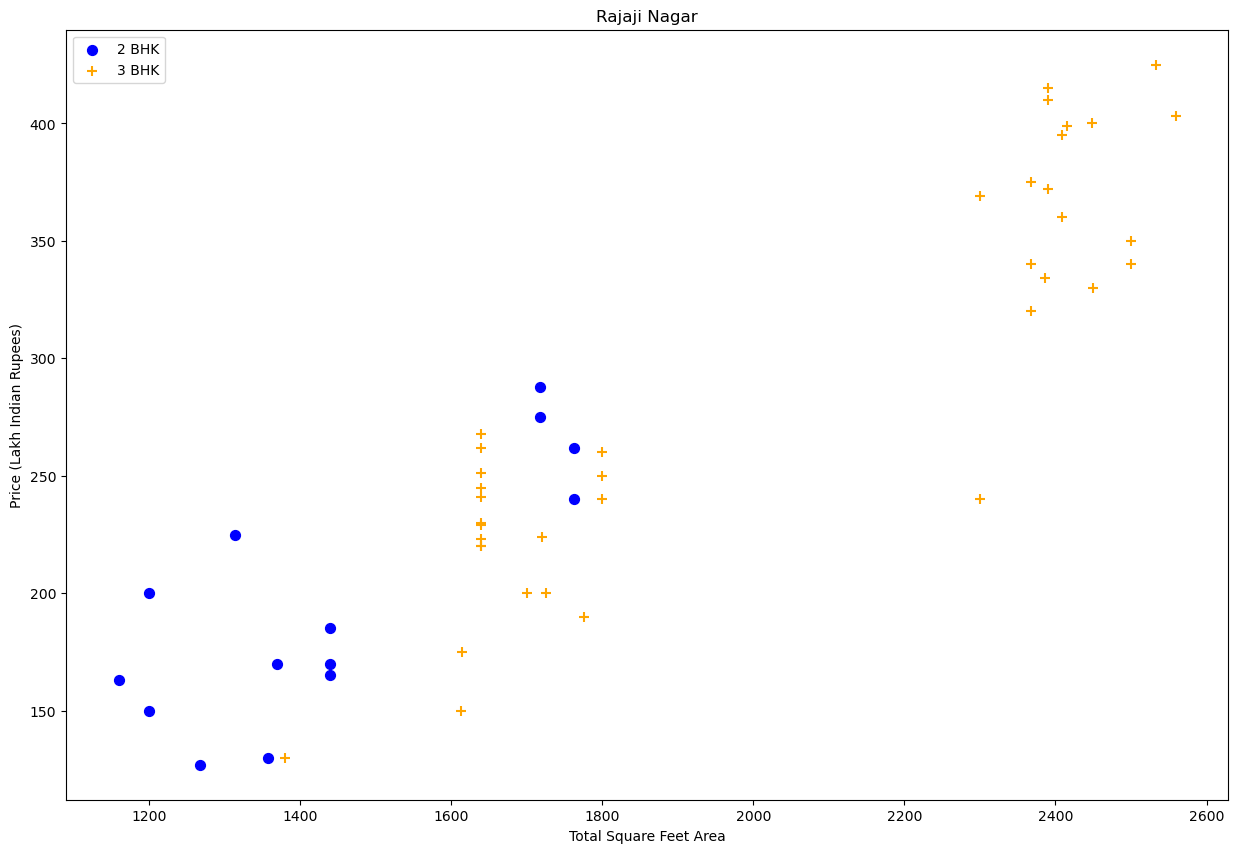

In [63]:
#In few cases we may find the scenarios where the price of 2BHK is greater than 3BHK for the same carpet area and same
#locations, which are certainly outliers and we should be wanting to remove them
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, color='orange', marker='+', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df7, "Rajaji Nagar")

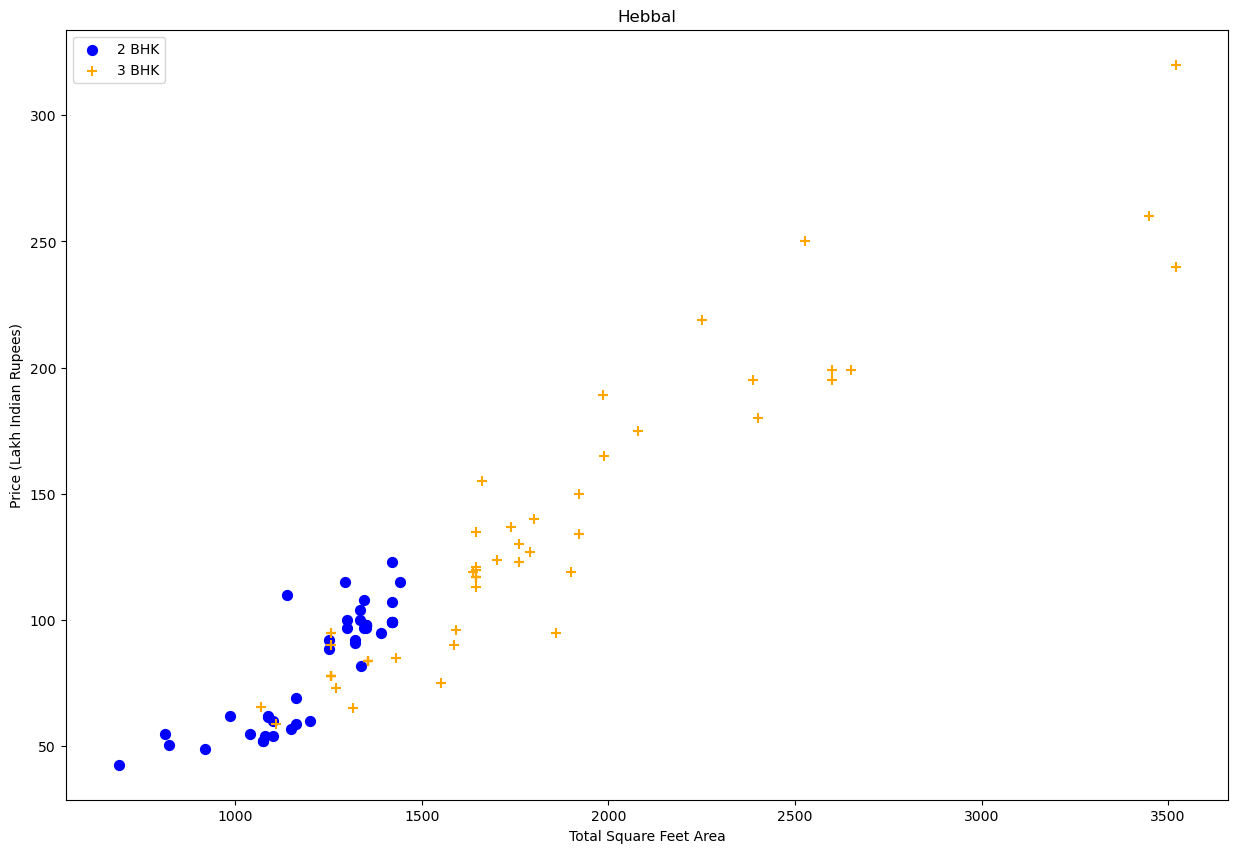

In [64]:
plot_scatter_chart(df7,"Hebbal")

In [65]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7317, 7)

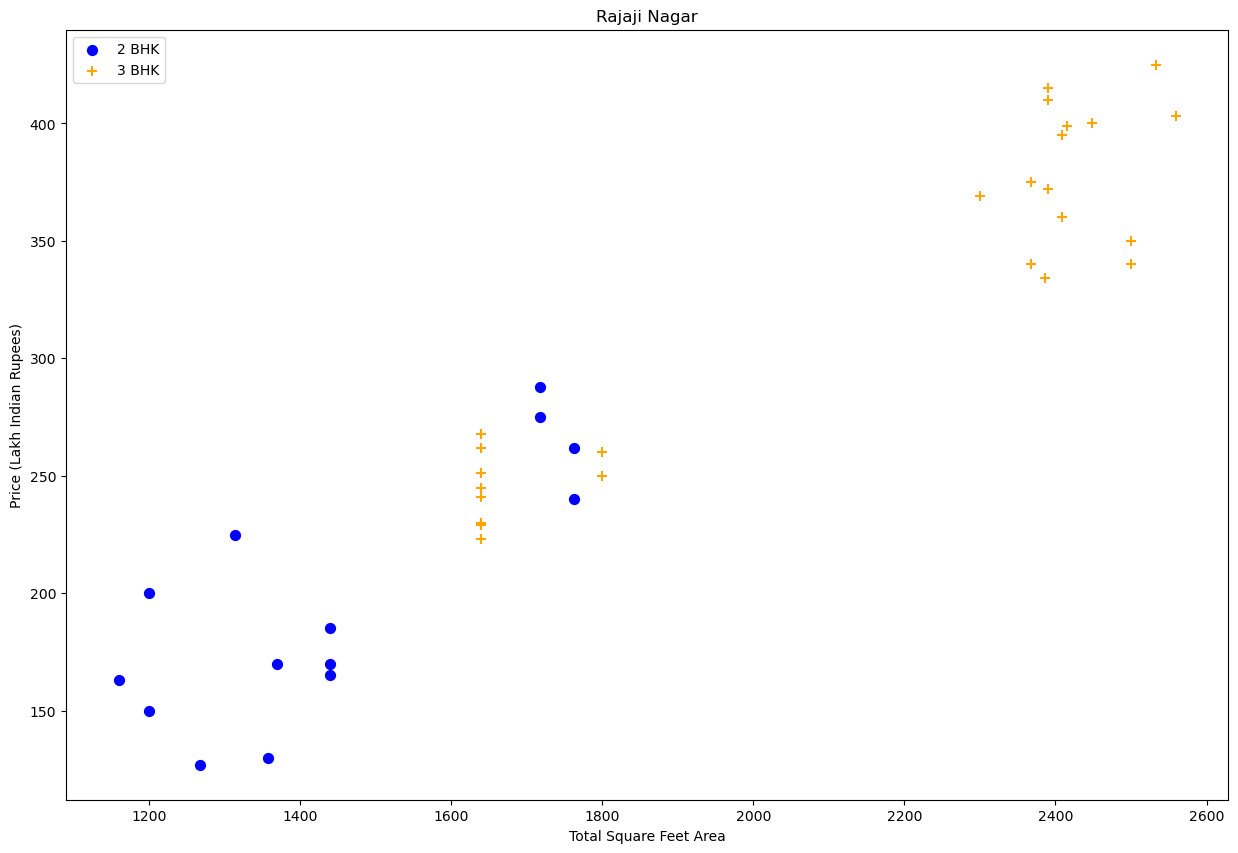

In [66]:
plot_scatter_chart(df8,"Rajaji Nagar")

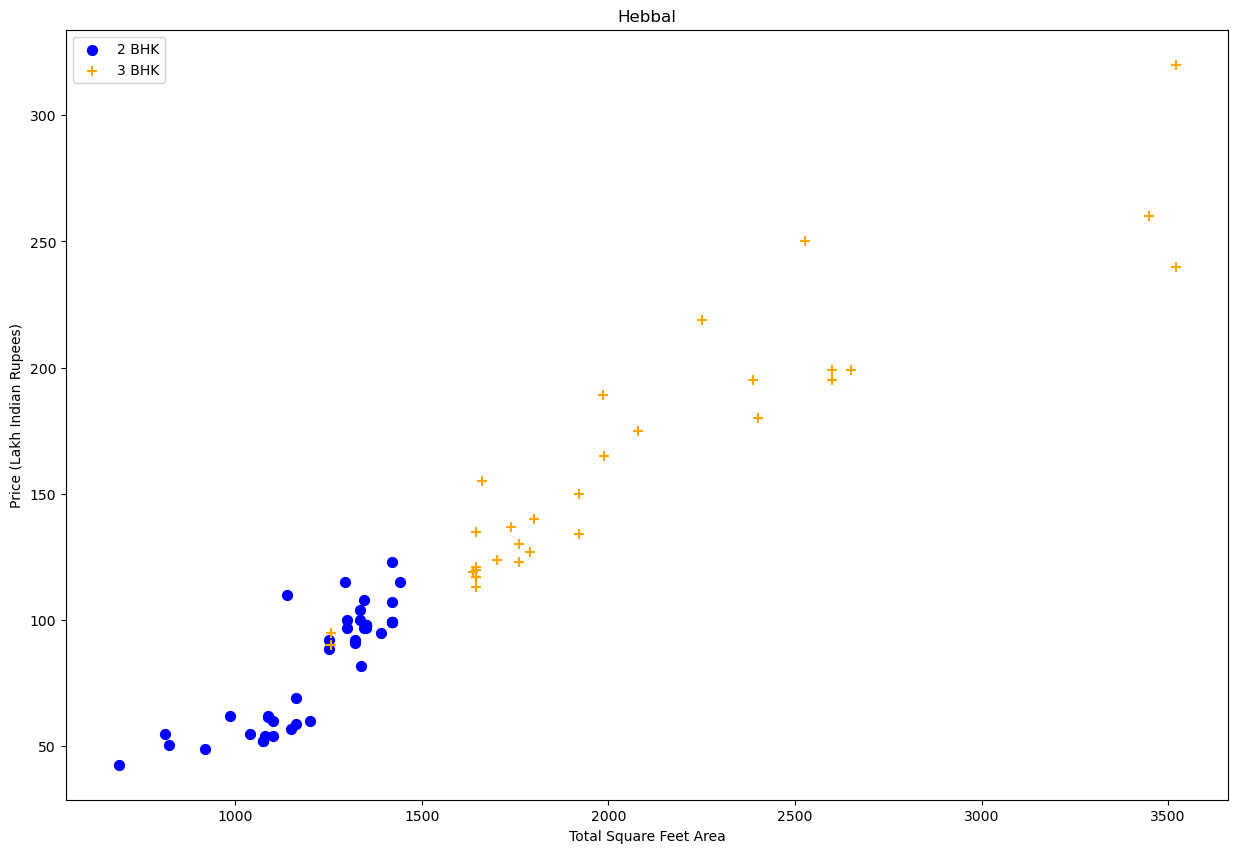

In [67]:
plot_scatter_chart(df8,"Hebbal")


Text(0, 0.5, 'Count')

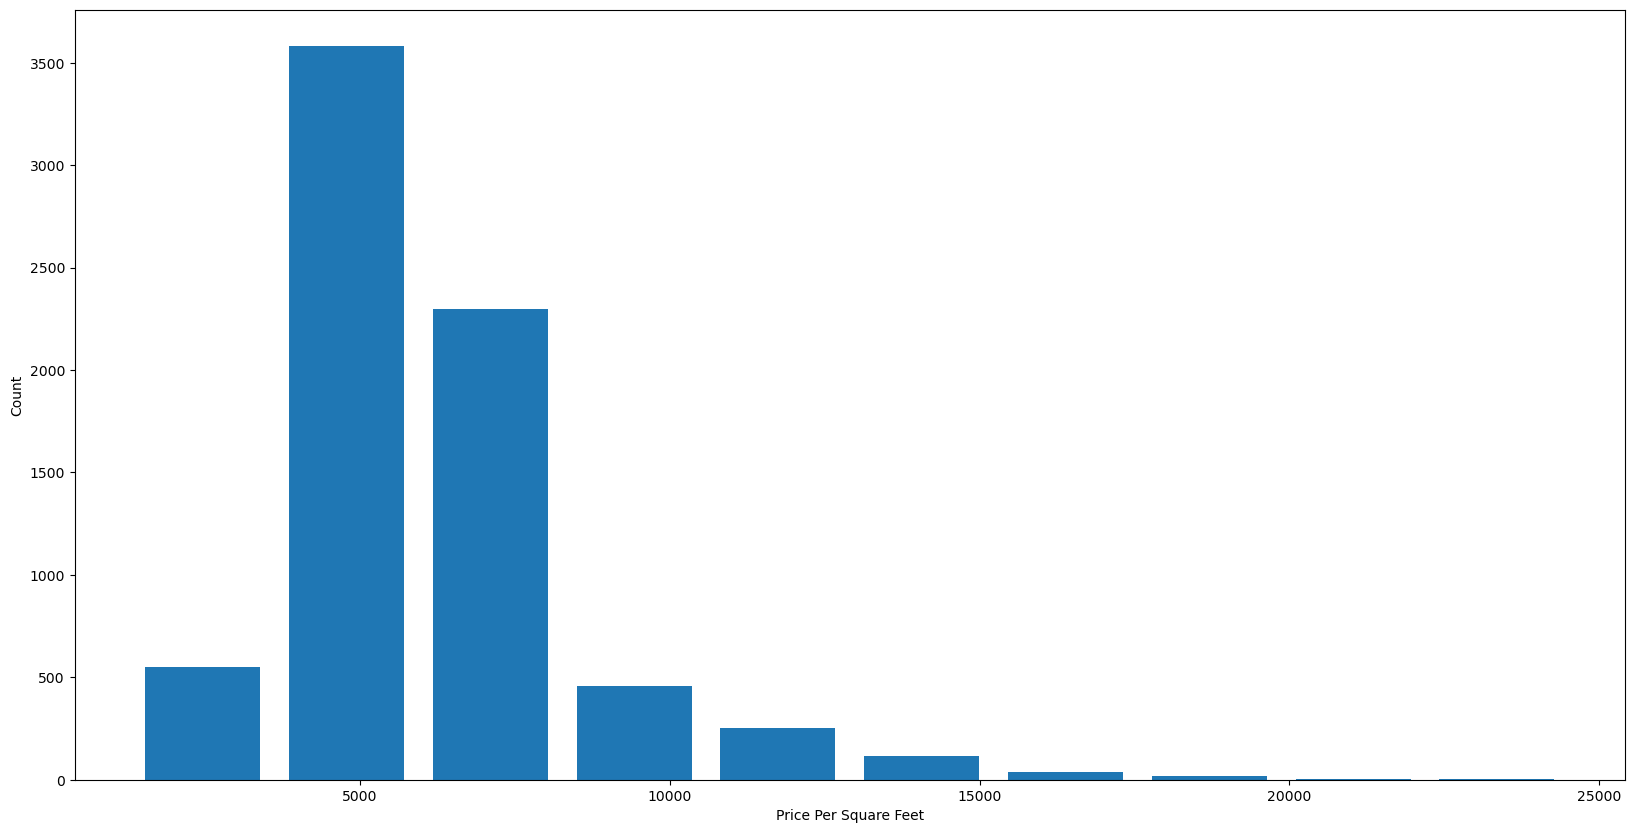

In [68]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft, rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

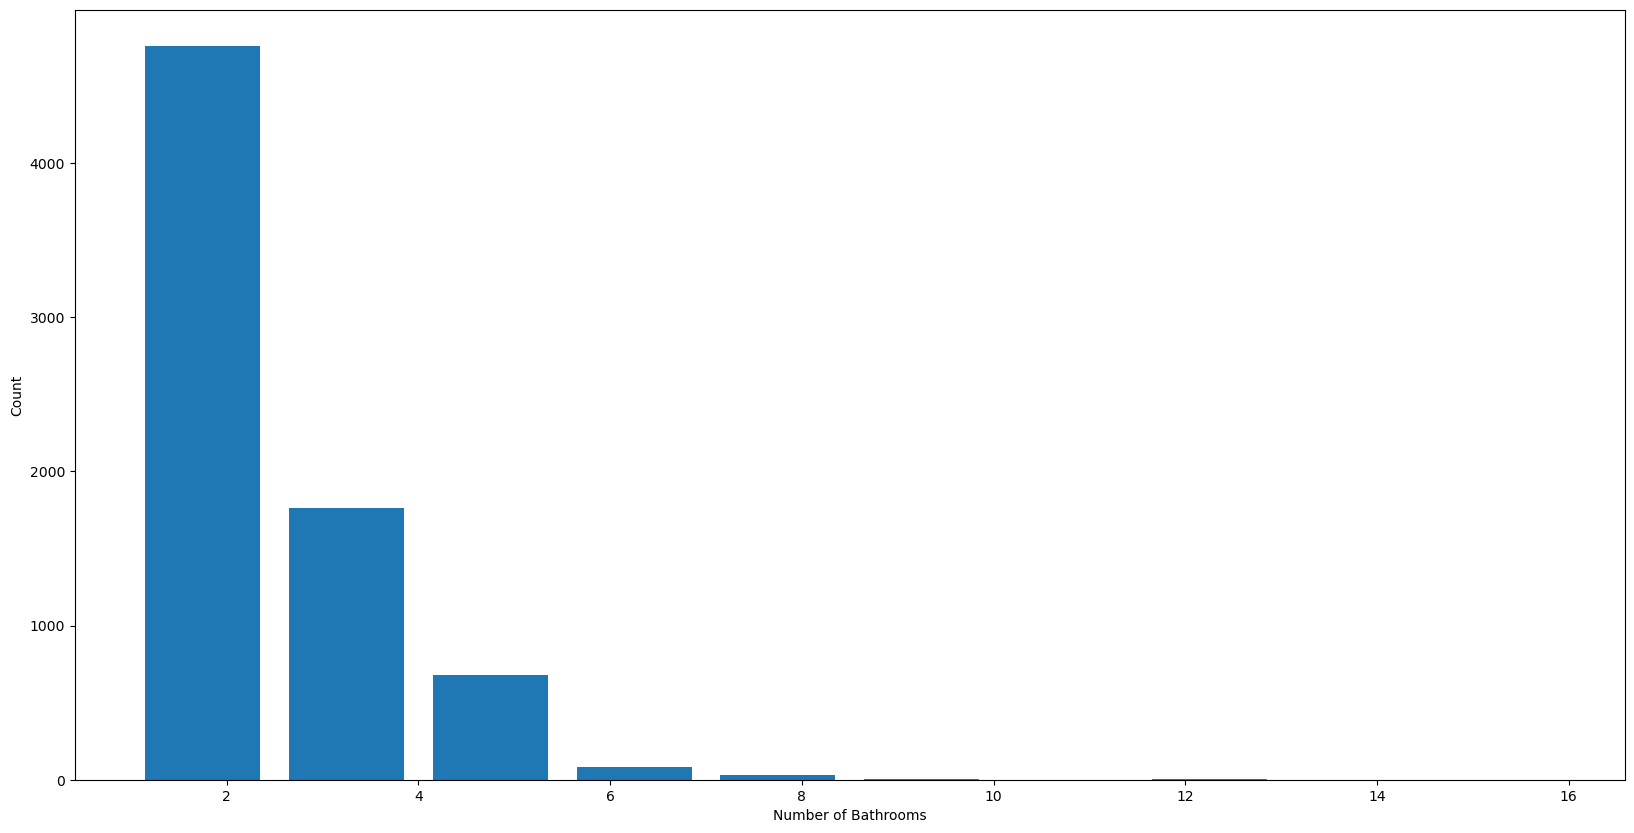

In [69]:
plt.hist(df8.bath, rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")

In [70]:
df8[df8.bath>10]
#It is unusual to have 2 more bathrooms than no. of bedrooms

location    size  total_sqft  bath  price  bhk  price_per_sqft
5277  Neeladri Nagar  10 BHK      4000.0  12.0  160.0   10     4000.000000
8483           other  10 BHK     12000.0  12.0  525.0   10     4375.000000
8572           other  16 BHK     10000.0  16.0  550.0   16     5500.000000
9306           other  11 BHK      6000.0  12.0  150.0   11     2500.000000
9637           other  13 BHK      5425.0  13.0  275.0   13     5069.124424

In [71]:
df8[df8.bath>df8.bhk+2]

location       size  total_sqft  bath   price  bhk  price_per_sqft
1626  Chikkabanavar  4 Bedroom      2460.0   7.0    80.0    4     3252.032520
5238     Nagasandra  4 Bedroom      7000.0   8.0   450.0    4     6428.571429
6711    Thanisandra      3 BHK      1806.0   6.0   116.0    3     6423.034330
8408          other      6 BHK     11338.0   9.0  1000.0    6     8819.897689

In [72]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7239, 7)

In [73]:
df10 = df9.drop(['size', 'price_per_sqft'], axis='columns')
df10.head()

location  total_sqft  bath  price  bhk
0  1st Block Jayanagar      2850.0   4.0  428.0    4
1  1st Block Jayanagar      1630.0   3.0  194.0    3
2  1st Block Jayanagar      1875.0   2.0  235.0    3
3  1st Block Jayanagar      1200.0   2.0  130.0    3
4  1st Block Jayanagar      1235.0   2.0  148.0    2

In [74]:
dummies = pd.get_dummies(df10.location)
dummies.head(20)

1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                     1                   0                          0   
1                     1                   0                          0   
2                     1                   0                          0   
3                     1                   0                          0   
4                     1                   0                          0   
5                     1                   0                          0   
6                     1                   0                          0   
8                     0                   1                          0   
9                     0                   1                          0   
10                    0                   1                          0   
12                    0                   1                          0   
13                    0                   1                          0   
14                    0                   1                          0   
15                    0                   1                          0   
16                    0                   1                          0   
17                    0                   1                          0   
18                    0                   1                          0   
19                    0                   1                          0   
20                    0                   1                          0   
21                    0                   1                          0   

    2nd Stage Nagarbhavi  5th Block Hbr Layout  5th Phase JP Nagar  \
0                      0                     0                   0   
1                      0                     0                   0   
2                      0                     0                   0   
3                      0                     0                   0   
4                      0                     0                   0   
5                      0                     0                   0   
6                      0                     0                   0   
8                      0                     0                   0   
9                      0                     0                   0   
10                     0                     0                   0   
12                     0                     0                   0   
13                     0                     0                   0   
14                     0                     0                   0   
15                     0                     0                   0   
16                     0                     0                   0   
17                     0                     0                   0   
18                     0                     0                   0   
19                     0                     0                   0   
20                     0                     0                   0   
21                     0                     0                   0   

    6th Phase JP Nagar  7th Phase JP Nagar  8th Phase JP Nagar  \
0                    0                   0                   0   
1                    0                   0                   0   
2                    0                   0                   0   
3                    0                   0                   0   
4                    0                   0                   0   
5                    0                   0                   0   
6                    0                   0                   0   
8                    0                   0                   0   
9                    0                   0                   0   
10                   0                   0                   0   
12                   0                   0                   0   
13                   0                   0                   0   
14                   0                   0                   0   
15                   0                   0            

In [75]:
df11 = pd.concat([df10, dummies.drop('other', axis='columns')], axis='columns')
df11.head()

location  total_sqft  bath  price  bhk  1st Block Jayanagar  \
0  1st Block Jayanagar      2850.0   4.0  428.0    4                    1   
1  1st Block Jayanagar      1630.0   3.0  194.0    3                    1   
2  1st Block Jayanagar      1875.0   2.0  235.0    3                    1   
3  1st Block Jayanagar      1200.0   2.0  130.0    3                    1   
4  1st Block Jayanagar      1235.0   2.0  148.0    2                    1   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
0                   0                          0                     0   
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
0                     0  ...            0                     0   
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 245 columns]

In [76]:
df12 = df11.drop('location', axis='columns')
df12.head()

total_sqft  bath  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0    4                    1                   0   
1      1630.0   3.0  194.0    3                    1                   0   
2      1875.0   2.0  235.0    3                    1                   0   
3      1200.0   2.0  130.0    3                    1                   0   
4      1235.0   2.0  148.0    2                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   5th Phase JP Nagar  ...  Vijayanagar  Vishveshwarya Layout  \
0                   0  ...            0                     0   
1                   0  ...            0                     0   
2                   0  ...            0                     0   
3                   0  ...            0                     0   
4                   0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
0                   0            0           0               0          0   
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0                   0            0             0  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  

[5 rows x 244 columns]

In [77]:
X = df12.drop(['price'], axis='columns')
X.head()

total_sqft  bath  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0    4                    1                   0   
1      1630.0   3.0    3                    1                   0   
2      1875.0   2.0    3                    1                   0   
3      1200.0   2.0    3                    1                   0   
4      1235.0   2.0    2                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   

   5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0                   0                   0  ...            0   
1                   0                   0  ...            0   
2                   0                   0  ...            0   
3                   0                   0  ...            0   
4                   0                   0  ...            0   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     0                   0            0           0   
1                     0                   0            0           0   
2                     0                   0            0           0   
3                     0                   0            0           0   
4                     0                   0            0           0   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
0               0          0                   0            0             0  
1               0          0                   0            0             0  
2               0          0                   0            0             0  
3               0          0                   0            0             0  
4               0          0                   0            0             0  

[5 rows x 243 columns]

In [78]:
y=df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

In [80]:
from sklearn.linear_model import LinearRegression as ls
reg = ls()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.8629132245229478

In [81]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(ls(), X,y, cv=cv)

#We can see that in 5 iterations we get a score of above 80% all the time.
#This is pretty goof but we want to test a few other algorithsms for regression to see if 
#We can get even bettwr score. We will use GridSearchCV for this purpose.

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [82]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': ls(),
            'params': {
                
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])
find_best_model_using_gridsearchcv(X,y)

/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "/Users/

model  best_score  \
0  linear_regression    0.847796   
1              lasso    0.726772   
2      decision_tree    0.717830   

                                         best_params  
0                                                 {}  
1                {'alpha': 2, 'selection': 'random'}  
2  {'criterion': 'friedman_mse', 'splitter': 'best'}

In [83]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if loc_index>=0:
        x[loc_index]=1
    return reg.predict([x])[0]

In [84]:
predict_price('1st Phase JP Nagar', 1000,2,2)


/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.86570258306718

In [85]:
import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(reg,f)
    
#We have exported the tested model to a pickle file

In [86]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline


In [88]:
df = pd.read_csv("./Downloads/MagicBricks.csv")
df.head()

Area  BHK  Bathroom      Furnishing  \
0  800.0    3       2.0  Semi-Furnished   
1  750.0    2       2.0  Semi-Furnished   
2  950.0    2       2.0       Furnished   
3  600.0    2       2.0  Semi-Furnished   
4  650.0    2       2.0  Semi-Furnished   

                                            Locality  Parking     Price  \
0                                   Rohini Sector 25      1.0   6500000   
1             J R Designers Floors, Rohini Sector 24      1.0   5000000   
2                Citizen Apartment, Rohini Sector 13      1.0  15500000   
3                                   Rohini Sector 24      1.0   4200000   
4  Rohini Sector 24 carpet area 650 sqft status R...      1.0   6200000   

          Status   Transaction           Type  Per_Sqft  
0  Ready_to_move  New_Property  Builder_Floor       NaN  
1  Ready_to_move  New_Property      Apartment    6667.0  
2  Ready_to_move        Resale      Apartment    6667.0  
3  Ready_to_move        Resale  Builder_Floor    6667.0  
4  Ready_to_move  New_Property  Builder_Floor    6667.0

In [89]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [90]:
df.shape

(1259, 11)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [92]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [93]:
df.Bathroom.unique()

array([ 2.,  3.,  4.,  1., nan,  5.,  6.,  7.])

In [94]:
df.Furnishing.unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished', nan], dtype=object)

In [95]:
df.Parking.unique()

array([  1.,   5.,   2.,  nan,   4.,   9.,   3.,  39.,  10., 114.])

In [96]:
df.Type.unique()

array(['Builder_Floor', 'Apartment', nan], dtype=object)

In [97]:
df.Per_Sqft.unique()

array([    nan,   6667.,   6154.,   6364.,   8750.,   9722.,  14444.,
        22000.,   2235.,   3800.,   4247.,   3524.,  26666.,  15972.,
       183333.,  20000.,  15556.,  16176.,   9259.,  18507.,   7000.,
        72000.,  43000.,   4444.,   3300.,  40000.,   5185.,   4000.,
         3567.,   1259.,   2500.,   5255.,   6528.,   6875.,   5714.,
         7449.,   8125.,   7931.,   5789.,   6471.,   8438.,   6508.,
         8000.,   6000.,   6250.,   6333.,   6714.,  28797.,  23840.,
         4600.,   4620.,   5000.,   6111.,  25512.,  22222.,  24718.,
        30556.,  18750., 120000.,  15459.,  23529.,  16667.,  11111.,
        21409.,  95000.,  15363.,  19259.,  20833.,  20930.,   6526.,
         3901.,   6347.,  41304.,   8701.,   5556.,  85715.,   6944.,
         7222.,  11220.,   5357.,   6706.,  10288.,  28283.,   8923.,
         8222.,  14550.,  30093.,  35714.,  22857.,  12500.,   4040.,
         7778.,  32000.,   5666.,  11667., 112179.,   6584.,   5794.,
         7500., 1600

In [98]:
df1 = df.drop(['Furnishing','Transaction','Type','Status'], axis = 'columns')

In [99]:
df1

Area  BHK  Bathroom  \
0       800.0    3       2.0   
1       750.0    2       2.0   
2       950.0    2       2.0   
3       600.0    2       2.0   
4       650.0    2       2.0   
...       ...  ...       ...   
1254   4118.0    4       5.0   
1255   1050.0    3       2.0   
1256    875.0    3       3.0   
1257    990.0    2       2.0   
1258  11050.0    3       3.0   

                                               Locality  Parking     Price  \
0                                      Rohini Sector 25      1.0   6500000   
1                J R Designers Floors, Rohini Sector 24      1.0   5000000   
2                   Citizen Apartment, Rohini Sector 13      1.0  15500000   
3                                      Rohini Sector 24      1.0   4200000   
4     Rohini Sector 24 carpet area 650 sqft status R...      1.0   6200000   
...                                                 ...      ...       ...   
1254                                  Chittaranjan Park      3.0  55000000   
1255                                  Chittaranjan Park      3.0  12500000   
1256                                  Chittaranjan Park      3.0  17500000   
1257                          Chittaranjan Park Block A      1.0  11500000   
1258                                  Chittaranjan Park      1.0  18500000   

      Per_Sqft  
0          NaN  
1       6667.0  
2       6667.0  
3       6667.0  
4       6667.0  
...        ...  
1254   12916.0  
1255   12916.0  
1256   12916.0  
1257   12916.0  
1258   12916.0  

[1259 rows x 7 columns]

In [100]:
len(df1)

1259

In [101]:
df1.isnull().sum()

Area          0
BHK           0
Bathroom      2
Locality      0
Parking      33
Price         0
Per_Sqft    241
dtype: int64

In [102]:
df2 = df1.dropna()

In [103]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 1 to 1258
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      1005 non-null   float64
 1   BHK       1005 non-null   int64  
 2   Bathroom  1005 non-null   float64
 3   Locality  1005 non-null   object 
 4   Parking   1005 non-null   float64
 5   Price     1005 non-null   int64  
 6   Per_Sqft  1005 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 62.8+ KB


In [104]:
df2.head()

Area  BHK  Bathroom                                           Locality  \
1   750.0    2       2.0             J R Designers Floors, Rohini Sector 24   
2   950.0    2       2.0                Citizen Apartment, Rohini Sector 13   
3   600.0    2       2.0                                   Rohini Sector 24   
4   650.0    2       2.0  Rohini Sector 24 carpet area 650 sqft status R...   
5  1300.0    4       3.0                                   Rohini Sector 24   

   Parking     Price  Per_Sqft  
1      1.0   5000000    6667.0  
2      1.0  15500000    6667.0  
3      1.0   4200000    6667.0  
4      1.0   6200000    6667.0  
5      1.0  15500000    6667.0

In [105]:
df3 = df2[~(df2.Bathroom >4)]

In [106]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944 entries, 1 to 1258
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      944 non-null    float64
 1   BHK       944 non-null    int64  
 2   Bathroom  944 non-null    float64
 3   Locality  944 non-null    object 
 4   Parking   944 non-null    float64
 5   Price     944 non-null    int64  
 6   Per_Sqft  944 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 59.0+ KB


In [107]:
round(df3.Area)

1         750.0
2         950.0
3         600.0
4         650.0
5        1300.0
         ...   
1253     1200.0
1255     1050.0
1256      875.0
1257      990.0
1258    11050.0
Name: Area, Length: 944, dtype: float64

In [108]:
df3.head()

Area  BHK  Bathroom                                           Locality  \
1   750.0    2       2.0             J R Designers Floors, Rohini Sector 24   
2   950.0    2       2.0                Citizen Apartment, Rohini Sector 13   
3   600.0    2       2.0                                   Rohini Sector 24   
4   650.0    2       2.0  Rohini Sector 24 carpet area 650 sqft status R...   
5  1300.0    4       3.0                                   Rohini Sector 24   

   Parking     Price  Per_Sqft  
1      1.0   5000000    6667.0  
2      1.0  15500000    6667.0  
3      1.0   4200000    6667.0  
4      1.0   6200000    6667.0  
5      1.0  15500000    6667.0

In [109]:
df3[df3.BHK < df3.Bathroom]

Area  BHK  Bathroom  \
74    1850.0    3       4.0   
136   1100.0    2       3.0   
162    729.0    3       4.0   
166    405.0    2       3.0   
167    666.0    1       2.0   
249   4800.0    3       4.0   
341     70.0    1       2.0   
373    387.0    1       2.0   
421     70.0    2       3.0   
439    850.0    2       3.0   
458    650.0    1       2.0   
463    600.0    1       2.0   
468    550.0    1       2.0   
556   2100.0    3       4.0   
608    900.0    2       3.0   
624    820.0    2       3.0   
664   2090.0    3       4.0   
667   2100.0    3       4.0   
672   1700.0    3       4.0   
674   1250.0    2       3.0   
678   2065.0    3       4.0   
685   1400.0    2       3.0   
754    445.0    1       2.0   
799   1600.0    3       4.0   
831    500.0    1       2.0   
912   2316.0    3       4.0   
915    900.0    2       3.0   
1085  1800.0    3       4.0   
1089  1600.0    3       4.0   
1187  1150.0    2       3.0   
1197  1000.0    2       3.0   
1215  1500.0    3       4.0   
1217  1800.0    3       4.0   
1218  1600.0    3       4.0   
1222  1980.0    3       4.0   
1235  1070.0    2       3.0   
1249  1900.0    3       4.0   

                                               Locality  Parking      Price  \
74                                               Dwarka      1.0   24000000   
136                                      Lajpat Nagar 2      1.0   22500000   
162                                          Budh Vihar      1.0    2600000   
166                                  Budh Vihar Phase 2      1.0    6200000   
167                                  Budh Vihar Phase 1      1.0    3500000   
249                   Maharani Bagh, New Friends Colony      1.0   85000000   
341                              Yamuna Vihar, Shahdara      1.0    4500000   
373                  Guru Angad Nagar West, Laxmi Nagar      2.0    1700000   
421                      Patel Nagar South, Patel Nagar      1.0    8200000   
439                                    Patel Nagar West      1.0    5900000   
458            DDA Flats Sector E Pocket 1, Vasant Kunj      1.0    7400000   
463                         E2 Vasant Kunj, Vasant Kunj      2.0    7000000   
468                                Vasant Kunj Sector D      1.0    7500000   
556                                               Saket      2.0   25000000   
608                                       Paschim Vihar      1.0    8500000   
624                                       Paschim Vihar      1.0    7500000   
664   Common Wealth Games Village, Commonwealth Game...      2.0   44000000   
667   Common Wealth Games Village, Commonwealth Game...      2.0   34300000   
672                     Commonwealth Games Village 2010      2.0   40000000   
674   Common Wealth Games Village, Commonwealth Game...      1.0   29000000   
678   Common Wealth Games Village, Commonwealth Game...      2.0   42500000   
685   Common Wealth Games Village, Commonwealth Game...      3.0   28600000   
754                                 Sultanpur Extension      1.0    1650000   
799                   DLF Chattarpur Farms, Chhattarpur      1.0   60000000   
831                                            Mehrauli      1.0    2100000   
912                   Geetanjali Enclave, Malviya Nagar      1.0  100000000   
915   Malviya Nagar carpet area 100 sqyrd status Rea...      2.0   12500000   
1085                               Sheikh Sarai Phase 1      2.0   19000000   
1089                               Sheikh Sarai Phase 1      1.0   18800000   
1187                     Deshbandhu Apartments, Kalkaji      2.0   16100000   
1197                                  Kalkaji Extention      1.0   11000000   
1215                                          Hauz Khas      2.0   45000000   
1217                                          Hauz Khas      2.0   47000000   
1218                                          Hauz Khas      2.0   27500000   
1222                   Sarva Priya Apartment, Hauz Khas      1.0

In [110]:
df4 = df3[~(df3.Parking >4)]

In [111]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 1 to 1258
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      929 non-null    float64
 1   BHK       929 non-null    int64  
 2   Bathroom  929 non-null    float64
 3   Locality  929 non-null    object 
 4   Parking   929 non-null    float64
 5   Price     929 non-null    int64  
 6   Per_Sqft  929 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 58.1+ KB


In [112]:
location_stat = df4.groupby(['Locality'])['Locality'].agg('count').sort_values(ascending = False)

In [113]:
location_stat_less_than4 = location_stat[location_stat ==2]

In [114]:
len(location_stat_less_than4)

47

In [115]:
df4.Locality = df4['Locality'].apply(lambda x : 'other' if x in location_stat_less_than4 else x)

/var/folders/1m/_xgqxl9d1hj52nshcqf32hrr0000gn/T/ipykernel_38156/2036827217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.Locality = df4['Locality'].apply(lambda x : 'other' if x in location_stat_less_than4 else x)


In [116]:
df4.groupby(['Locality'])['Locality'].agg('count').sort_values(ascending = False)

Locality
other                                     94
J R Designers Floors, Rohini Sector 24    31
Lajpat Nagar 2                            27
Yamuna Vihar, Shahdara                    26
Kailash Colony, Greater Kailash           22
                                          ..
Kishangarh, Vasant Kunj                    1
Krishan Kunj, Laxmi Nagar                  1
Krishna Nagar Block A                      1
LIC Colony, Paschim Vihar                  1
Mayur Apartment, Rohini Sector 9           1
Name: Locality, Length: 248, dtype: int64

In [117]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929 entries, 1 to 1258
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      929 non-null    float64
 1   BHK       929 non-null    int64  
 2   Bathroom  929 non-null    float64
 3   Locality  929 non-null    object 
 4   Parking   929 non-null    float64
 5   Price     929 non-null    int64  
 6   Per_Sqft  929 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 58.1+ KB


In [118]:
df5 = df4[~(df4.Area/df4.BHK <300)]

In [119]:
df5

Area  BHK  Bathroom  \
1       750.0    2       2.0   
2       950.0    2       2.0   
3       600.0    2       2.0   
4       650.0    2       2.0   
5      1300.0    4       3.0   
...       ...  ...       ...   
1252   1800.0    3       3.0   
1253   1200.0    3       3.0   
1255   1050.0    3       2.0   
1257    990.0    2       2.0   
1258  11050.0    3       3.0   

                                               Locality  Parking     Price  \
1                J R Designers Floors, Rohini Sector 24      1.0   5000000   
2                   Citizen Apartment, Rohini Sector 13      1.0  15500000   
3                                      Rohini Sector 24      1.0   4200000   
4     Rohini Sector 24 carpet area 650 sqft status R...      1.0   6200000   
5                                      Rohini Sector 24      1.0  15500000   
...                                                 ...      ...       ...   
1252                                              other      1.0  26000000   
1253                                  Chittaranjan Park      1.0  16500000   
1255                                  Chittaranjan Park      3.0  12500000   
1257                          Chittaranjan Park Block A      1.0  11500000   
1258                                  Chittaranjan Park      1.0  18500000   

      Per_Sqft  
1       6667.0  
2       6667.0  
3       6667.0  
4       6667.0  
5       6667.0  
...        ...  
1252   12916.0  
1253   12916.0  
1255   12916.0  
1257   12916.0  
1258   12916.0  

[776 rows x 7 columns]

In [120]:
df4[(df4.Area/df4.BHK <300)]

Area  BHK  Bathroom  \
11     870.0000    3       2.0   
14     344.4448    2       2.0   
16     550.0000    2       2.0   
17    1100.0000    4       3.0   
26     800.0000    3       2.0   
...         ...  ...       ...   
1092   855.0000    3       2.0   
1127   195.0000    3       3.0   
1136   464.0000    3       1.0   
1247   125.0000    3       3.0   
1256   875.0000    3       3.0   

                                               Locality  Parking     Price  \
11                                     Rohini Sector 25      1.0   7700000   
14    Rohini Sector 8 How Auctions work? The borrowe...      1.0   3310000   
16                                     Rohini Sector 22      1.0   4500000   
17                                     Rohini Sector 16      1.0  17000000   
26                                     Rohini Sector 25      1.0   7000000   
...                                                 ...      ...       ...   
1092                                              other      1.0   6500000   
1127               Punjabi Bagh Extension, Punjabi Bagh      1.0  28000000   
1136                                              other      1.0   4200000   
1247                                  Chittaranjan Park      2.0  11500000   
1256                                  Chittaranjan Park      3.0  17500000   

      Per_Sqft  
11      6154.0  
14      6154.0  
16      6154.0  
17      6154.0  
26      8750.0  
...        ...  
1092   10556.0  
1127   11905.0  
1136   15278.0  
1247    6878.0  
1256   12916.0  

[153 rows x 7 columns]

In [121]:
df4[(df4.Area/df4.BHK <300)]

Area  BHK  Bathroom  \
11     870.0000    3       2.0   
14     344.4448    2       2.0   
16     550.0000    2       2.0   
17    1100.0000    4       3.0   
26     800.0000    3       2.0   
...         ...  ...       ...   
1092   855.0000    3       2.0   
1127   195.0000    3       3.0   
1136   464.0000    3       1.0   
1247   125.0000    3       3.0   
1256   875.0000    3       3.0   

                                               Locality  Parking     Price  \
11                                     Rohini Sector 25      1.0   7700000   
14    Rohini Sector 8 How Auctions work? The borrowe...      1.0   3310000   
16                                     Rohini Sector 22      1.0   4500000   
17                                     Rohini Sector 16      1.0  17000000   
26                                     Rohini Sector 25      1.0   7000000   
...                                                 ...      ...       ...   
1092                                              other      1.0   6500000   
1127               Punjabi Bagh Extension, Punjabi Bagh      1.0  28000000   
1136                                              other      1.0   4200000   
1247                                  Chittaranjan Park      2.0  11500000   
1256                                  Chittaranjan Park      3.0  17500000   

      Per_Sqft  
11      6154.0  
14      6154.0  
16      6154.0  
17      6154.0  
26      8750.0  
...        ...  
1092   10556.0  
1127   11905.0  
1136   15278.0  
1247    6878.0  
1256   12916.0  

[153 rows x 7 columns]

In [122]:
df5.Per_Sqft.describe()

count       776.000000
mean      15294.487113
std       19916.685744
min        1259.000000
25%        6526.000000
50%       11905.000000
75%       18000.000000
max      183333.000000
Name: Per_Sqft, dtype: float64

In [123]:
df6 = df5[~(df5.Per_Sqft < 2500)]

In [124]:
df6.Per_Sqft.describe()

count       769.000000
mean      15415.371912
std       19966.637073
min        2500.000000
25%        6584.000000
50%       11905.000000
75%       18000.000000
max      183333.000000
Name: Per_Sqft, dtype: float64

Text(0, 0.5, 'Count')

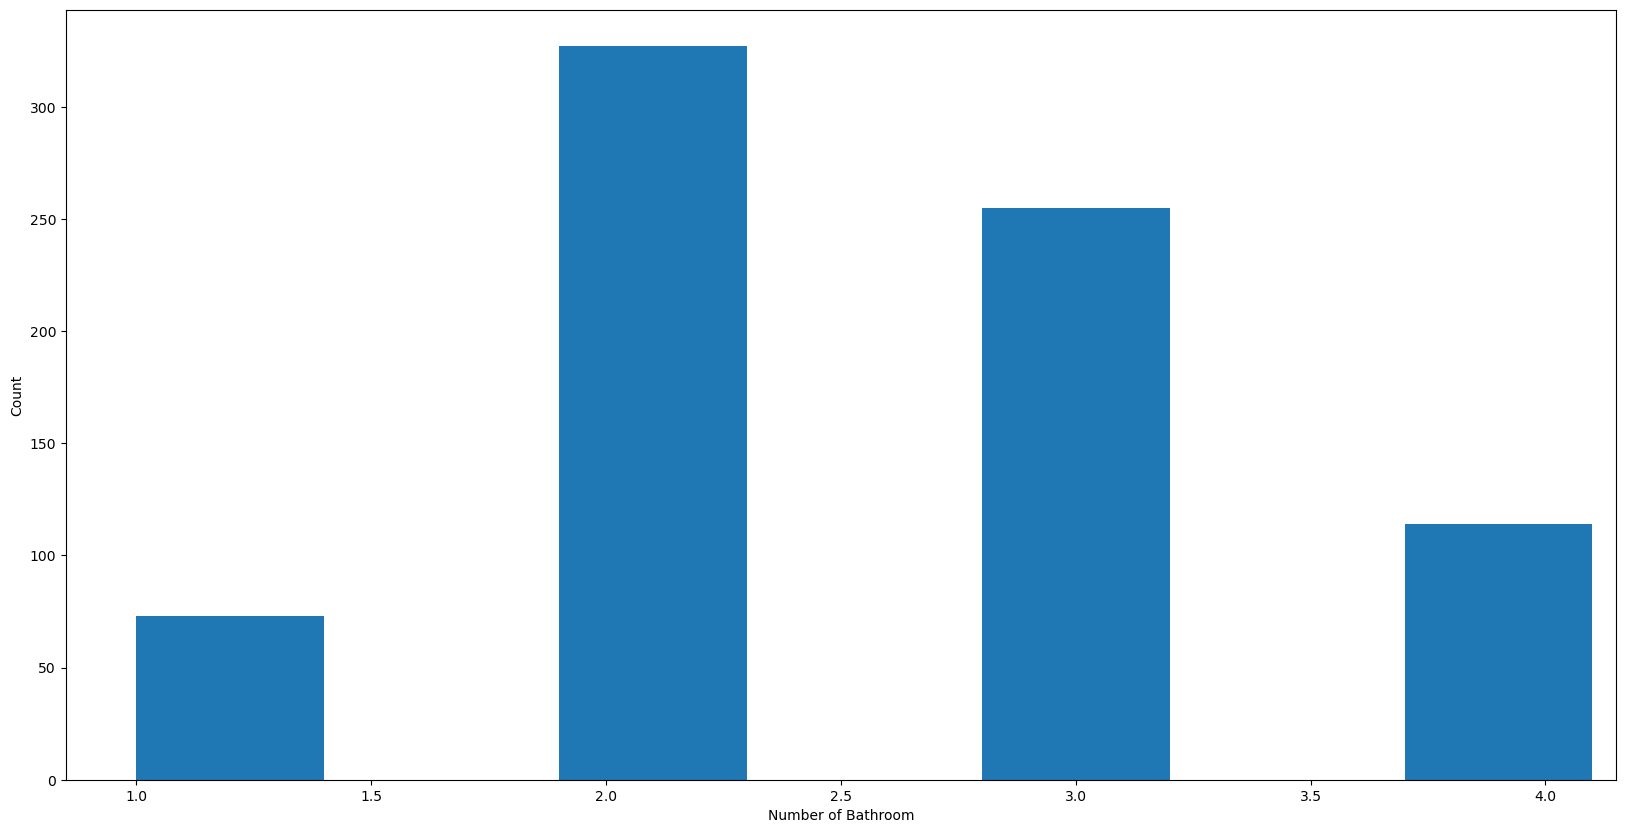

In [125]:
plt.hist(df6.Bathroom, width = 0.4)
plt.xlabel('Number of Bathroom')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

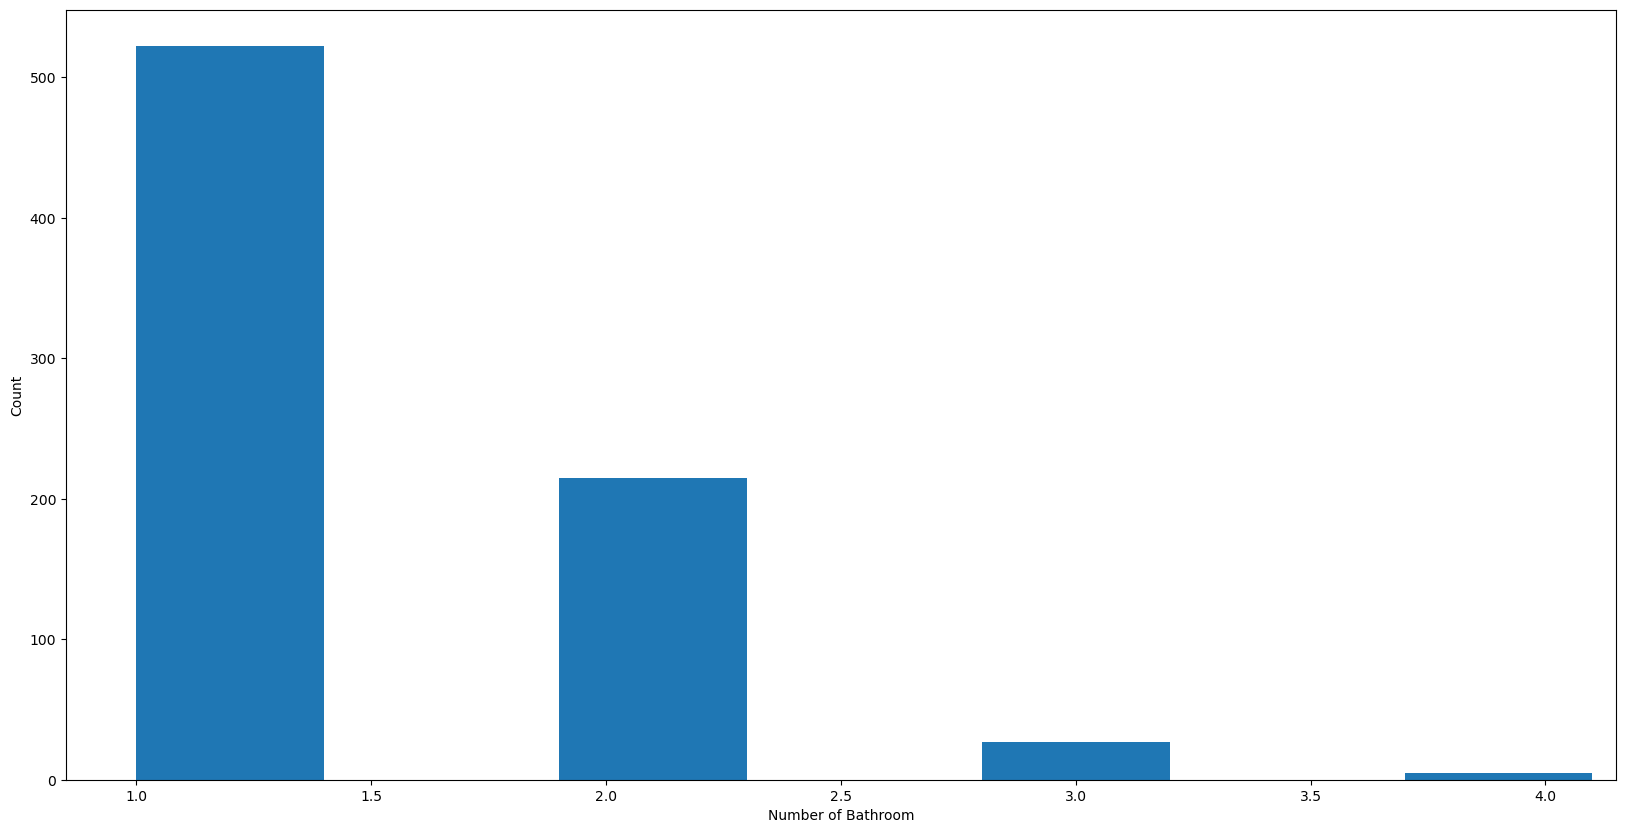

In [126]:
plt.hist(df6.Parking, width = 0.4)
plt.xlabel('Number of Bathroom')
plt.ylabel('Count')

In [127]:
df6[df6.BHK < (df6.Parking)]

Area  BHK  Bathroom  \
22     430.556    1       1.0   
123   1350.000    2       2.0   
278    900.000    2       2.0   
328   1053.000    3       2.0   
373    387.000    1       2.0   
425    900.000    2       2.0   
463    600.000    1       2.0   
472   1100.000    2       2.0   
571   1500.000    3       3.0   
685   1400.000    2       3.0   
806    765.000    2       2.0   
870    450.000    1       1.0   
874    350.000    1       1.0   
916   1500.000    2       2.0   
919    500.000    1       1.0   
944    370.000    1       1.0   
1086   600.000    1       1.0   
1114  2572.000    3       3.0   

                                               Locality  Parking     Price  \
22    Rohini Sector 18 carpet area 40 sqm status Rea...      2.0   5300000   
123                                      Lajpat Nagar 2      4.0  12500000   
278                     Kailash Colony, Greater Kailash      3.0  20000000   
328                                               other      4.0   7000000   
373                  Guru Angad Nagar West, Laxmi Nagar      2.0   1700000   
425                                    Patel Nagar West      3.0   7400000   
463                         E2 Vasant Kunj, Vasant Kunj      2.0   7000000   
472                                         Vasant Kunj      3.0  16500000   
571                                  Safdarjung Enclave      4.0  37500000   
685   Common Wealth Games Village, Commonwealth Game...      3.0  28600000   
806                                         Chhattarpur      4.0   2500000   
870                                               other      2.0   2200000   
874                                              Narela      3.0   2500000   
916                                       Malviya Nagar      3.0  13000000   
919                                       Malviya Nagar      2.0   2300000   
944                      Dilshad Colony, Dilshad Garden      2.0   2400000   
1086                               Sheikh Sarai Phase 2      2.0   7000000   
1114                                  Punjabi Bagh West      4.0  35000000   

      Per_Sqft  
22      6154.0  
123     9259.0  
278    11111.0  
328    41304.0  
373    32000.0  
425    23840.0  
463    20833.0  
472    21818.0  
571    25000.0  
685    20967.0  
806     4138.0  
870     4889.0  
874     7143.0  
916    14888.0  
919    14888.0  
944     6486.0  
1086   10556.0  
1114   13608.0

In [128]:
df6.head()

Area  BHK  Bathroom                                           Locality  \
1   750.0    2       2.0             J R Designers Floors, Rohini Sector 24   
2   950.0    2       2.0                Citizen Apartment, Rohini Sector 13   
3   600.0    2       2.0                                   Rohini Sector 24   
4   650.0    2       2.0  Rohini Sector 24 carpet area 650 sqft status R...   
5  1300.0    4       3.0                                   Rohini Sector 24   

   Parking     Price  Per_Sqft  
1      1.0   5000000    6667.0  
2      1.0  15500000    6667.0  
3      1.0   4200000    6667.0  
4      1.0   6200000    6667.0  
5      1.0  15500000    6667.0

In [129]:
df7 = df6.drop(['Per_Sqft'],axis = 'columns')

In [130]:
df7

Area  BHK  Bathroom  \
1       750.0    2       2.0   
2       950.0    2       2.0   
3       600.0    2       2.0   
4       650.0    2       2.0   
5      1300.0    4       3.0   
...       ...  ...       ...   
1252   1800.0    3       3.0   
1253   1200.0    3       3.0   
1255   1050.0    3       2.0   
1257    990.0    2       2.0   
1258  11050.0    3       3.0   

                                               Locality  Parking     Price  
1                J R Designers Floors, Rohini Sector 24      1.0   5000000  
2                   Citizen Apartment, Rohini Sector 13      1.0  15500000  
3                                      Rohini Sector 24      1.0   4200000  
4     Rohini Sector 24 carpet area 650 sqft status R...      1.0   6200000  
5                                      Rohini Sector 24      1.0  15500000  
...                                                 ...      ...       ...  
1252                                              other      1.0  26000000  
1253                                  Chittaranjan Park      1.0  16500000  
1255                                  Chittaranjan Park      3.0  12500000  
1257                          Chittaranjan Park Block A      1.0  11500000  
1258                                  Chittaranjan Park      1.0  18500000  

[769 rows x 6 columns]

In [131]:
df7['BHK'] = df7['BHK'].astype(float)
df7['Price'] = df7['Price'].astype(float)

In [132]:
df7.dtypes

Area        float64
BHK         float64
Bathroom    float64
Locality     object
Parking     float64
Price       float64
dtype: object

In [133]:
df7.to_csv('df7.csv')

In [134]:
dummies = pd.get_dummies(df7.Locality,dtype=float)

In [135]:
dummies

Abhimanyu Apartments, Vasundhara Enclave  \
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
5                                          0.0   
...                                        ...   
1252                                       0.0   
1253                                       0.0   
1255                                       0.0   
1257                                       0.0   
1258                                       0.0   

      Abul Fazal Enclave Part 1, Okhla  Abul Fazal Enclave Part-II, Okhla  \
1                                  0.0                                0.0   
2                                  0.0                                0.0   
3                                  0.0                                0.0   
4                                  0.0                                0.0   
5                                  0.0                                0.0   
...                                ...                                ...   
1252                               0.0                                0.0   
1253                               0.0                                0.0   
1255                               0.0                                0.0   
1257                               0.0                                0.0   
1258                               0.0                                0.0   

      Ahinsha Vatika, Ram Nagar, Shahdara  Alaknanda  \
1                                     0.0        0.0   
2                                     0.0        0.0   
3                                     0.0        0.0   
4                                     0.0        0.0   
5                                     0.0        0.0   
...                                   ...        ...   
1252                                  0.0        0.0   
1253                                  0.0        0.0   
1255                                  0.0        0.0   
1257                                  0.0        0.0   
1258                                  0.0        0.0   

      Amar Colony, Lajpat Nagar  Anekant Apartment, Vasundhara Enclave  \
1                           0.0                                    0.0   
2                           0.0                                    0.0   
3                           0.0                                    0.0   
4                           0.0                                    0.0   
5                           0.0                                    0.0   
...                         ...                                    ...   
1252                        0.0                                    0.0   
1253                        0.0                                    0.0   
1255                        0.0                                    0.0   
1257                        0.0                                    0.0   
1258                        0.0                                    0.0   

      Anupam Enclave, Saket  \
1                       0.0   
2                       0.0   
3                       0.0   
4                       0.0   
5                       0.0   
...                     ...   
1252                    0.0   
1253                    0.0   
1255                    0.0   
1257                    0.0   
1258                    0.0   

      Apna Apartments, Savitri Nagar Village, Sheikh Sarai  \
1                                                   0.0      
2                                                   0.0      
3                                                   0.0      
4                                                   0.0      
5                                                   0.0      
...                                                 ...      
1252                                                0.0      
1253                                             

In [136]:
df8 = pd.concat([df7,dummies.drop('other',axis='columns')],axis = 'columns')
df8

Area  BHK  Bathroom  \
1       750.0  2.0       2.0   
2       950.0  2.0       2.0   
3       600.0  2.0       2.0   
4       650.0  2.0       2.0   
5      1300.0  4.0       3.0   
...       ...  ...       ...   
1252   1800.0  3.0       3.0   
1253   1200.0  3.0       3.0   
1255   1050.0  3.0       2.0   
1257    990.0  2.0       2.0   
1258  11050.0  3.0       3.0   

                                               Locality  Parking       Price  \
1                J R Designers Floors, Rohini Sector 24      1.0   5000000.0   
2                   Citizen Apartment, Rohini Sector 13      1.0  15500000.0   
3                                      Rohini Sector 24      1.0   4200000.0   
4     Rohini Sector 24 carpet area 650 sqft status R...      1.0   6200000.0   
5                                      Rohini Sector 24      1.0  15500000.0   
...                                                 ...      ...         ...   
1252                                              other      1.0  26000000.0   
1253                                  Chittaranjan Park      1.0  16500000.0   
1255                                  Chittaranjan Park      3.0  12500000.0   
1257                          Chittaranjan Park Block A      1.0  11500000.0   
1258                                  Chittaranjan Park      1.0  18500000.0   

      Abhimanyu Apartments, Vasundhara Enclave  \
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
5                                          0.0   
...                                        ...   
1252                                       0.0   
1253                                       0.0   
1255                                       0.0   
1257                                       0.0   
1258                                       0.0   

      Abul Fazal Enclave Part 1, Okhla  Abul Fazal Enclave Part-II, Okhla  \
1                                  0.0                                0.0   
2                                  0.0                                0.0   
3                                  0.0                                0.0   
4                                  0.0                                0.0   
5                                  0.0                                0.0   
...                                ...                                ...   
1252                               0.0                                0.0   
1253                               0.0                                0.0   
1255                               0.0                                0.0   
1257                               0.0                                0.0   
1258                               0.0                                0.0   

      Ahinsha Vatika, Ram Nagar, Shahdara  ...  Vasant Kunj  \
1                                     0.0  ...          0.0   
2                                     0.0  ...          0.0   
3                                     0.0  ...          0.0   
4                                     0.0  ...          0.0   
5                                     0.0  ...          0.0   
...                                   ...  ...          ...   
1252                                  0.0  ...          0.0   
1253                                  0.0  ...          0.0   
1255                                  0.0  ...          0.0   
1257                                  0.0  ...          0.0   
1258                                  0.0  ...          0.0   

      Vasant Kunj Sector A  Vasant Kunj Sector B  Vasant Kunj Sector C  \
1                      0.0                   0.0                   0.0   
2                      0.0                   0.0                   0.0   
3                      0.0                   0.0                   0.0   
4                      0.0                   0.0                   0.0   
5         

In [137]:
df9 = df8.drop('Locality',axis = 'columns')
df9

Area  BHK  Bathroom  Parking       Price  \
1       750.0  2.0       2.0      1.0   5000000.0   
2       950.0  2.0       2.0      1.0  15500000.0   
3       600.0  2.0       2.0      1.0   4200000.0   
4       650.0  2.0       2.0      1.0   6200000.0   
5      1300.0  4.0       3.0      1.0  15500000.0   
...       ...  ...       ...      ...         ...   
1252   1800.0  3.0       3.0      1.0  26000000.0   
1253   1200.0  3.0       3.0      1.0  16500000.0   
1255   1050.0  3.0       2.0      3.0  12500000.0   
1257    990.0  2.0       2.0      1.0  11500000.0   
1258  11050.0  3.0       3.0      1.0  18500000.0   

      Abhimanyu Apartments, Vasundhara Enclave  \
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
5                                          0.0   
...                                        ...   
1252                                       0.0   
1253                                       0.0   
1255                                       0.0   
1257                                       0.0   
1258                                       0.0   

      Abul Fazal Enclave Part 1, Okhla  Abul Fazal Enclave Part-II, Okhla  \
1                                  0.0                                0.0   
2                                  0.0                                0.0   
3                                  0.0                                0.0   
4                                  0.0                                0.0   
5                                  0.0                                0.0   
...                                ...                                ...   
1252                               0.0                                0.0   
1253                               0.0                                0.0   
1255                               0.0                                0.0   
1257                               0.0                                0.0   
1258                               0.0                                0.0   

      Ahinsha Vatika, Ram Nagar, Shahdara  Alaknanda  ...  Vasant Kunj  \
1                                     0.0        0.0  ...          0.0   
2                                     0.0        0.0  ...          0.0   
3                                     0.0        0.0  ...          0.0   
4                                     0.0        0.0  ...          0.0   
5                                     0.0        0.0  ...          0.0   
...                                   ...        ...  ...          ...   
1252                                  0.0        0.0  ...          0.0   
1253                                  0.0        0.0  ...          0.0   
1255                                  0.0        0.0  ...          0.0   
1257                                  0.0        0.0  ...          0.0   
1258                                  0.0        0.0  ...          0.0   

      Vasant Kunj Sector A  Vasant Kunj Sector B  Vasant Kunj Sector C  \
1                      0.0                   0.0                   0.0   
2                      0.0                   0.0                   0.0   
3                      0.0                   0.0                   0.0   
4                      0.0                   0.0                   0.0   
5                      0.0                   0.0                   0.0   
...                    ...                   ...                   ...   
1252                   0.0                   0.0                   0.0   
1253                   0.0                   0.0                   0.0   
1255                   0.0                   0.0                   0.0   
1257                   0.0                   0.0                   0.0   
1258                   0.0                   0.0                   0.0   

      Vasant Kunj Sector D  Vasundhara Enclave  Vikram Vihar, Lajpat

In [138]:
x= df9.drop('Price',axis = 'columns')

In [139]:
y = df9.Price

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state =10)

In [142]:
from sklearn.linear_model import LinearRegression

In [143]:
model = LinearRegression()

In [144]:
x_train = x_train.fillna(x_train.mean())
y_train= y_train.fillna(y_train.mean())
x_test= x_test.fillna(x_train.mean())
y_test = y_test.fillna(y_train.mean())
x = x.fillna(x.mean())
y = y.fillna(y.mean())

In [145]:
model.fit(x_train,y_train)

LinearRegression()

In [146]:
model.score(x_test,y_test)

-4884760261349639.0

In [147]:
def predict_price(location,sqft,bath,bhk,park):
    loc_index = np.where(x.columns==location)[0][0]
    
    X= np.zeros(len(x.columns))
    X[0] = sqft
    X[1] = bath
    X[2] = bhk
    X[3] = park
    if loc_index >= 0:
        X[loc_index] =1
        
    return model.predict([X])[0]


In [148]:
predict_price('Rohini Sector 24',1300,3,4,1)

/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


20048382.03370713

In [149]:
predict_price('Chittaranjan Park',1700,5,4,2)

/Users/umair/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


39681083.866926596